# Feature Engineering, Feature Selection and Model Build

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#install if not available
!pip install psycopg2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 6.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.9-cp37-cp37m-linux_x86_64.whl size=494328 sha256=9ae41b0466c5520a3df9606041778654f22d22414048c350182f44af5fcc5c32
  Stored in directory: /home/ypd5yb/.cache/pip/wheels/2e/80/51/f1ee56ddad6078839563bc276734ab2609ba3aaab8aaa942ff
Successfully built psycopg2

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
#install if not available 
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.2 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 46.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 19.1.0
    Uninstalling attrs-19.1.0:
      Successfully uninstalled attrs-19.1.0

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:

#install if not available 
!pip install xgboost --no-cache-dir --pre

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 59.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
#install if not available 
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 545.7/545.7 kB 9.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
#DB CONNECTION

import psycopg2
from psycopg2 import sql
from psycopg2.extensions import adapt, register_adapter, AsIs
from sqlalchemy import create_engine,text
import getpass
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
#import model related libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import xgboost as xgb
import shap
from scipy.stats import randint









warnings.filterwarnings("ignore", category=UserWarning)



In [ ]:
database = 'f24t03'
user = 'jsmm8'
password = getpass.getpass("Type password and hit enter: ")



Type password and hit enter: ········


In [ ]:
#Create the connection and extract data from 'demographics_master' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the demographics_master table
query = "SELECT  * FROM demographics_master;"

# Use pandas to read the SQL query into a DataFrame
try:
    df = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df.shape

I am able to connect to the database
Data extracted successfully!


(15093, 52)

In [ ]:
#Create the connection and extract data from 'housing_stats_data' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the housing_stats_data table
query = "SELECT  * FROM housing_stats_data WHERE year IN (2020, 2021, 2022);"

# Use pandas to read the SQL query into a DataFrame
try:
    df4 = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df4.shape

I am able to connect to the database
Data extracted successfully!


(15093, 45)

In [10]:
#check sample
df4.head()

geo_id  median_value  total_estimate  est_total_occupied  \
0  1500000US290019501001        142300             581                 448   
1  1500000US290019501002        148300             607                 516   
2  1500000US290019501003         86100             499                 338   
3  1500000US290019502001         75300             421                 315   
4  1500000US290019502002         92300             547                 377   

   est_total_vacant  est_total_owner_occupied  est_total_rental  \
0               133                       435                13   
1                91                       453                63   
2               161                       303                35   
3               106                       259                56   
4               170                       332                45   

   estimate_total_less_than_10000  estimate_total_10000_to_14999  \
0                               0                              0   
1                              10                              6   
2                               5                              5   
3                              39                              8   
4                               7                              0   

   estimate_total_15000_to_19999  ...        county     state  year  \
0                              9  ...  Adair County  Missouri  2020   
1                              0  ...  Adair County  Missouri  2020   
2                              5  ...  Adair County  Missouri  2020   
3                             24  ...  Adair County  Missouri  2020   
4                              8  ...  Adair County  Missouri  2020   

   pct_occupied  pct_vacant  pct_owner_occupied  pct_rental  occ_per_1000  \
0     77.108434   22.891566           97.098214    2.901786    771.084337   
1     85.008237   14.991763           87.790698   12.209302    850.082372   
2     67.735471   32.264529           89.644970   10.355030    677.354709   
3     74.821853   25.178147           82.222222   17.777778    748.218527   
4     68.921389   31.078611           88.063660   11.936340    689.213894   

   vac_per_1000  housing_category  
0    228.915663    Occupied-Owner  
1    149.917628    Occupied-Owner  
2    322.645291    Occupied-Owner  
3    251.781473    Occupied-Owner  
4    310.786106    Occupied-Owner  

[5 rows x 45 columns]

In [11]:
#check column names
df4.columns

Index(['geo_id', 'median_value', 'total_estimate', 'est_total_occupied',
       'est_total_vacant', 'est_total_owner_occupied', 'est_total_rental',
       'estimate_total_less_than_10000', 'estimate_total_10000_to_14999',
       'estimate_total_15000_to_19999', 'estimate_total_20000_to_24999',
       'estimate_total_25000_to_29999', 'estimate_total_30000_to_34999',
       'estimate_total_35000_to_39999', 'estimate_total_40000_to_49999',
       'estimate_total_50000_to_59999', 'estimate_total_60000_to_69999',
       'estimate_total_70000_to_79999', 'estimate_total_80000_to_89999',
       'estimate_total_90000_to_99999', 'estimate_total_100000_to_124999',
       'estimate_total_125000_to_149999', 'estimate_total_150000_to_174999',
       'estimate_total_175000_to_199999', 'estimate_total_200000_to_249999',
       'estimate_total_250000_to_299999', 'estimate_total_300000_to_399999',
       'estimate_total_400000_to_499999', 'estimate_total_500000_to_749999',
       'estimate_total_750000_

In [12]:
# Perform the merge based on 'geo_id' and 'year' but extracting the columns (Not housing distribution data) 
merged_result = pd.merge(df, df4[['geo_id', 'year', 'median_value',
       'pct_occupied', 'pct_vacant', 'pct_owner_occupied', 'pct_rental', 'housing_category']], on=['geo_id', 'year'], how='left')

merged_result['pct_occupied'] = merged_result['pct_occupied'].round(2) 
merged_result['pct_vacant'] = merged_result['pct_vacant'].round(2) 
merged_result['pct_owner_occupied'] = merged_result['pct_owner_occupied'].round(2) 
merged_result['pct_rental'] = merged_result['pct_rental'].round(2) 
#create a copy
merged_df = merged_result

# Display the first few rows of the resulting DataFrame
merged_result.head()


geo_id  year  total_population  shannon_index  \
0  1500000US290019501001  2020              1284          0.058   
1  1500000US290019501002  2020              1403          0.093   
2  1500000US290019501003  2020              1007          0.284   
3  1500000US290019502001  2020               891          0.201   
4  1500000US290019502002  2020               991          0.215   

   simpsons_index  richness  simpson_dominance  berger_parker_dominance  \
0           0.031     0.500              0.969                    0.984   
1           0.058     0.375              0.942                    0.970   
2           0.266     0.625              0.734                    0.843   
3           0.140     0.500              0.860                    0.926   
4           0.166     0.500              0.834                    0.910   

   simpson_evenness    block_group  ... est_100to125k est_125to150k  \
0             0.041  Block Group 1  ...          0.31          0.14   
1             0.088  Block Group 2  ...          0.26          0.12   
2             0.333  Block Group 3  ...          0.09          0.16   
3             0.187  Block Group 1  ...          0.24          0.00   
4             0.221  Block Group 2  ...          0.25          0.17   

  est_150to200k est_more_than_200k  median_value  pct_occupied  pct_vacant  \
0          0.05               0.03        142300         77.11       22.89   
1          0.24               0.02        148300         85.01       14.99   
2          0.15               0.09         86100         67.74       32.26   
3          0.00               0.03         75300         74.82       25.18   
4          0.33               0.11         92300         68.92       31.08   

   pct_owner_occupied  pct_rental  housing_category  
0               97.10        2.90    Occupied-Owner  
1               87.79       12.21    Occupied-Owner  
2               89.64       10.36    Occupied-Owner  
3               82.22       17.78    Occupied-Owner  
4               88.06       11.94    Occupied-Owner  

[5 rows x 58 columns]

In [13]:
#Check info
merged_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15093 entries, 0 to 15092
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geo_id                       15093 non-null  object 
 1   year                         15093 non-null  int64  
 2   total_population             15093 non-null  int64  
 3   shannon_index                15093 non-null  float64
 4   simpsons_index               15093 non-null  float64
 5   richness                     15093 non-null  float64
 6   simpson_dominance            15093 non-null  float64
 7   berger_parker_dominance      15093 non-null  float64
 8   simpson_evenness             15093 non-null  float64
 9   block_group                  15093 non-null  object 
 10  census_tract                 15093 non-null  object 
 11  county                       15093 non-null  object 
 12  state                        15093 non-null  object 
 13  group_classifica

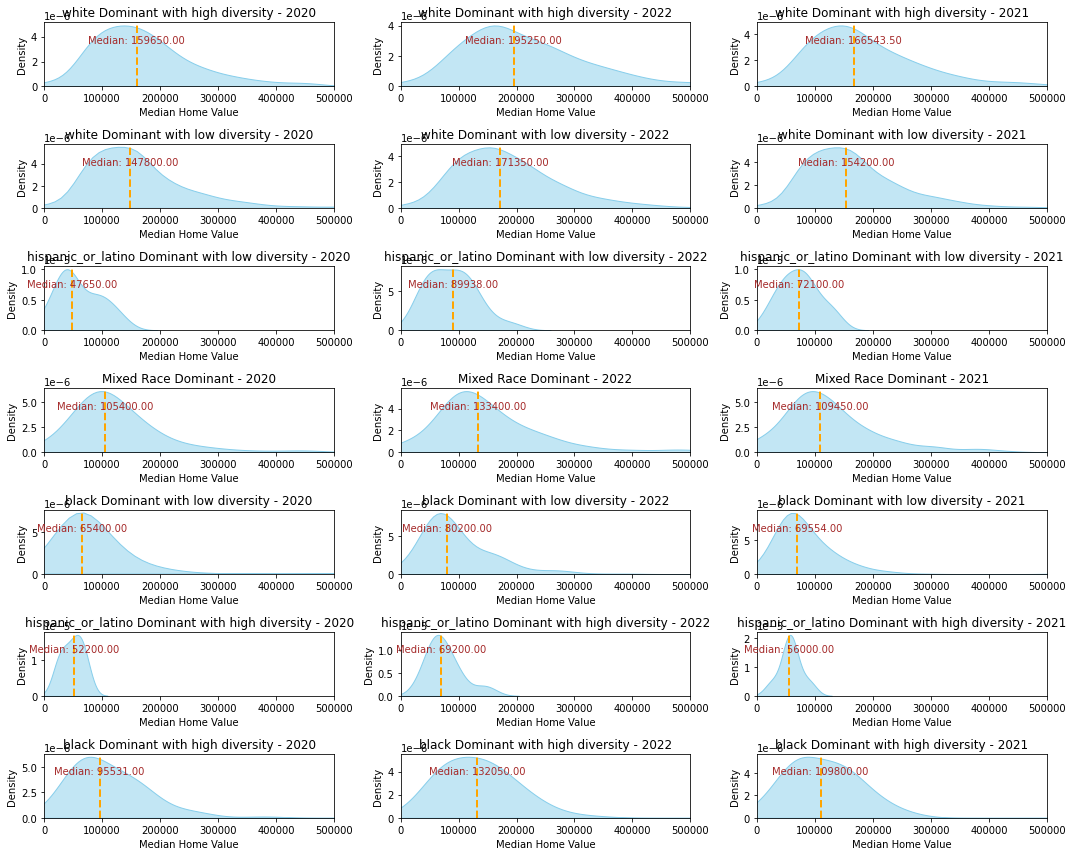

In [14]:

# Define the race groups and years 
race_groups = [
    'white Dominant with high diversity',
    'white Dominant with low diversity',
    'hispanic_or_latino Dominant with low diversity',
    'Mixed Race Dominant', 
    'black Dominant with low diversity',
    'hispanic_or_latino Dominant with high diversity',
    'black Dominant with high diversity'
]
years = merged_result['year'].unique()

# Set the figure size for the plots
plt.figure(figsize=(15, 12))

# Define fixed limits for the axes 
x_limit_min = 0  
x_limit_max = 500000  

# Create subplots for each race and year combination
for i, race in enumerate(race_groups):
    for j, year in enumerate(years):
        ax = plt.subplot(len(race_groups), len(years), i * len(years) + j + 1)
        
        # Filter the DataFrame for the specific year and race group
        subset = merged_result[(merged_result['year'] == year) & (merged_result['group_classification'] == race)]
        
        # Plot KDE (Density Plot)
        if not subset.empty:
            sns.kdeplot(subset['median_value'], ax=ax, shade=True, color='skyblue', alpha=0.5,legend = False)
            
            # Calculate and plot the median value line
            median_income = subset['median_value'].median()
            ax.axvline(median_income, color='orange', linestyle='dashed', linewidth=2)
            
            # Annotate the median value on the plot
            ax.text(median_income, ax.get_ylim()[1] * 0.8, f'Median: {median_income:.2f}', 
                    color='brown', ha='center', va='top')
        
        # Set the title and labels
        ax.set_title(f'{race} - {year}')
        ax.set_xlabel('Median Home Value')
        ax.set_ylabel('Density')
        ax.set_xlim(x_limit_min, x_limit_max)



plt.tight_layout()
plt.show()

In [15]:
# List of columns to drop, including education,income,housing and race group domiance classification
columns_to_drop = [
    'no_schooling',
    'prek_8th',
    'some_high_school_no_diploma',
    'high_school_graduate',
    'some_college_no_degree',
    'associates_degree',
    'bachelors_degree',
    'advanced_degree',
    'est_less_than_10k',
    'est_10to15k',
    'est_15to20k',
    'est_20to25k',
    'est_25to30k',
    'est_30to35k',
    'est_35to40k',
    'est_40to45k',
    'est_45to50k',
    'est_50to60k',
    'est_60to75k',
    'est_75to100k',
    'est_100to125k',
    'est_125to150k',
    'est_150to200k',
    'est_more_than_200k',
    'block_group',
    'census_tract',
    'state',
    'total_population',
    'county',
    'housing_category',
    'group_classification'
]

# Drop the specified columns from the DataFrame
merged_df = merged_result.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
merged_df.head()


geo_id  year  shannon_index  simpsons_index  richness  \
0  1500000US290019501001  2020          0.058           0.031     0.500   
1  1500000US290019501002  2020          0.093           0.058     0.375   
2  1500000US290019501003  2020          0.284           0.266     0.625   
3  1500000US290019502001  2020          0.201           0.140     0.500   
4  1500000US290019502002  2020          0.215           0.166     0.500   

   simpson_dominance  berger_parker_dominance  simpson_evenness  \
0              0.969                    0.984             0.041   
1              0.942                    0.970             0.088   
2              0.734                    0.843             0.333   
3              0.860                    0.926             0.187   
4              0.834                    0.910             0.221   

   hispanic_or_latino  asian  ...  weighted_education_score  \
0               0.000  0.000  ...                      4.76   
1               0.000  0.008  ...                      5.11   
2               0.176  0.000  ...                      4.77   
3               0.000  0.048  ...                      4.48   
4               0.082  0.000  ...                      5.37   

   higher_education_proportion  education_score_category  median_income  \
0                         0.21                    Medium        56313.0   
1                         0.28                    Medium        57167.0   
2                         0.16                    Medium        48409.0   
3                         0.13                       Low        34911.0   
4                         0.31                    Medium        54141.0   

   gini_coefficient  median_value  pct_occupied  pct_vacant  \
0              0.48        142300         77.11       22.89   
1              0.47        148300         85.01       14.99   
2              0.50         86100         67.74       32.26   
3              0.47         75300         74.82       25.18   
4              0.50         92300         68.92       31.08   

   pct_owner_occupied pct_rental  
0               97.10       2.90  
1               87.79      12.21  
2               89.64      10.36  
3               82.22      17.78  
4               88.06      11.94  

[5 rows x 27 columns]

In [16]:
#check info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15093 entries, 0 to 15092
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geo_id                       15093 non-null  object 
 1   year                         15093 non-null  int64  
 2   shannon_index                15093 non-null  float64
 3   simpsons_index               15093 non-null  float64
 4   richness                     15093 non-null  float64
 5   simpson_dominance            15093 non-null  float64
 6   berger_parker_dominance      15093 non-null  float64
 7   simpson_evenness             15093 non-null  float64
 8   hispanic_or_latino           15093 non-null  float64
 9   asian                        15093 non-null  float64
 10  black                        15093 non-null  float64
 11  native                       15093 non-null  float64
 12  other                        15093 non-null  float64
 13  pac_isl         

In [ ]:
#Create the connection and extract data from 'merged_new_house_data' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the merged_new_house_data table
query = "SELECT  * FROM merged_new_house_data;"

# Use pandas to read the SQL query into a DataFrame
try:
    df = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df.shape

I am able to connect to the database
Data extracted successfully!


(15093, 48)

In [18]:
#Check the new df which has additional variables that might affect housing prices
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   geo_id                           15093 non-null  object 
 1   block_group                      15093 non-null  object 
 2   census_tract                     15093 non-null  object 
 3   county                           15093 non-null  object 
 4   state                            15093 non-null  object 
 5   est_pop_16_and_above             15093 non-null  int64  
 6   est_tot_in_labor_force           15093 non-null  int64  
 7   est_tot_civilian                 15093 non-null  int64  
 8   est_tot_civilian_labor_employed  15093 non-null  int64  
 9   est_tot_civilian_unemployed      15093 non-null  int64  
 10  est_tot_armed_forces             15093 non-null  int64  
 11  est_total_not_in_labor_force     15093 non-null  int64  
 12  year              

In [19]:
#check sample
df.head()

geo_id    block_group       census_tract        county  \
0  1500000US290019501001  Block Group 1  Census Tract 9501  Adair County   
1  1500000US290019501002  Block Group 2  Census Tract 9501  Adair County   
2  1500000US290019501003  Block Group 3  Census Tract 9501  Adair County   
3  1500000US290019502001  Block Group 1  Census Tract 9502  Adair County   
4  1500000US290019502002  Block Group 2  Census Tract 9502  Adair County   

      state  est_pop_16_and_above  est_tot_in_labor_force  est_tot_civilian  \
0  Missouri                  1034                     637               637   
1  Missouri                  1146                     752               752   
2  Missouri                   759                     383               383   
3  Missouri                   707                     351               351   
4  Missouri                   770                     448               448   

   est_tot_civilian_labor_employed  est_tot_civilian_unemployed  ...  \
0                              637                            0  ...   
1                              653                           99  ...   
2                              379                            4  ...   
3                              335                           16  ...   
4                              420                           28  ...   

   est_without_mortgage  est_multiple_mortgages  est_total  est_under_50  \
0                   245                      13       1254            34   
1                   265                      28       1403           178   
2                   164                      11       1003            31   
3                   159                       2        891            62   
4                   219                      17        991            25   

   est_50_to_99  est_100_to_124  est_125_to_149  est_150_to_184  \
0           127              70              38              80   
1            61              53              19             130   
2            52               9              73             233   
3           165             164              34              49   
4            59              21              13             109   

   est_185_to_199  est_200_plus  
0               0           905  
1              62           900  
2              48           557  
3              12           405  
4              50           714  

[5 rows x 48 columns]

In [20]:
#remove text and also some other columns which are not needed 
columns_to_drop = [
    'block_group',
    'census_tract',
    'county',
    'state','est_median_rooms_total','est_occ'
    
]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [21]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   geo_id                           15093 non-null  object 
 1   est_pop_16_and_above             15093 non-null  int64  
 2   est_tot_in_labor_force           15093 non-null  int64  
 3   est_tot_civilian                 15093 non-null  int64  
 4   est_tot_civilian_labor_employed  15093 non-null  int64  
 5   est_tot_civilian_unemployed      15093 non-null  int64  
 6   est_tot_armed_forces             15093 non-null  int64  
 7   est_total_not_in_labor_force     15093 non-null  int64  
 8   year                             15093 non-null  int64  
 9   est_own_occ                      15093 non-null  int64  
 10  est_own_occ_2020_plus            15093 non-null  int64  
 11  est_own_occ_2010_19              15093 non-null  int64  
 12  est_own_occ_2000_0

In [22]:
#Check the sample of data where we need to convert raw numbers to percentages
df.iloc[:, 20:30].head()

est_own_occ_0br  est_own_occ_1br  est_own_occ_2br  est_own_occ_3br  \
0                0                3               79              276   
1                0               16               68              234   
2                0                4               79              185   
3                0               12               73              142   
4                0               31               77              158   

   est_own_occ_4br  est_own_occ_5br_plus  est_own_occ_kit_complete  \
0               53                    24                       421   
1              124                    11                       453   
2               25                    10                       291   
3               32                     0                       243   
4               63                     3                       329   

   est_own_occ_kit_lack  est_own_occ_plumb_complete  est_own_occ_plumb_lack  
0                    14                         421                      14  
1                     0                         453                       0  
2                    12                         294                       9  
3                    16                         243                      16  
4                     3                         332                       0

In [23]:
#Check owner occupied data
df['est_own_occ'].head()

0    435
1    453
2    303
3    259
4    332
Name: est_own_occ, dtype: int64

In [24]:
#calculate the % of kitchen completed or not
df['est_own_occ_kit_complete'] = df['est_own_occ_kit_complete']/df['est_own_occ']
df['est_own_occ_kit_lack'] = df['est_own_occ_kit_lack']/df['est_own_occ']

In [25]:
#Check data again to confirm change
df.iloc[:, 20:30].head()

est_own_occ_0br  est_own_occ_1br  est_own_occ_2br  est_own_occ_3br  \
0                0                3               79              276   
1                0               16               68              234   
2                0                4               79              185   
3                0               12               73              142   
4                0               31               77              158   

   est_own_occ_4br  est_own_occ_5br_plus  est_own_occ_kit_complete  \
0               53                    24                  0.967816   
1              124                    11                  1.000000   
2               25                    10                  0.960396   
3               32                     0                  0.938224   
4               63                     3                  0.990964   

   est_own_occ_kit_lack  est_own_occ_plumb_complete  est_own_occ_plumb_lack  
0              0.032184                         421                      14  
1              0.000000                         453                       0  
2              0.039604                         294                       9  
3              0.061776                         243                      16  
4              0.009036                         332                       0

In [26]:
#create % for plumbing completed
df['est_own_occ_plumb_complete'] = df['est_own_occ_plumb_complete']/df['est_own_occ']
df['est_own_occ_plumb_lack'] = df['est_own_occ_plumb_lack']/df['est_own_occ']

In [27]:
#check data sample
df.iloc[:, 25:35].head()


est_own_occ_5br_plus  est_own_occ_kit_complete  est_own_occ_kit_lack  \
0                    24                  0.967816              0.032184   
1                    11                  1.000000              0.000000   
2                    10                  0.960396              0.039604   
3                     0                  0.938224              0.061776   
4                     3                  0.990964              0.009036   

   est_own_occ_plumb_complete  est_own_occ_plumb_lack  est_median_rooms_owner  \
0                    0.967816                0.032184                     7.0   
1                    1.000000                0.000000                     6.0   
2                    0.970297                0.029703                     6.0   
3                    0.938224                0.061776                     6.0   
4                    1.000000                0.000000                     7.0   

   est_mortgage_debt  est_without_mortgage  est_multiple_mortgages  est_total  
0                190                   245                      13       1254  
1                188                   265                      28       1403  
2                139                   164                      11       1003  
3                100                   159                       2        891  
4                113                   219                      17        991

In [28]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   geo_id                           15093 non-null  object 
 1   est_pop_16_and_above             15093 non-null  int64  
 2   est_tot_in_labor_force           15093 non-null  int64  
 3   est_tot_civilian                 15093 non-null  int64  
 4   est_tot_civilian_labor_employed  15093 non-null  int64  
 5   est_tot_civilian_unemployed      15093 non-null  int64  
 6   est_tot_armed_forces             15093 non-null  int64  
 7   est_total_not_in_labor_force     15093 non-null  int64  
 8   year                             15093 non-null  int64  
 9   est_own_occ                      15093 non-null  int64  
 10  est_own_occ_2020_plus            15093 non-null  int64  
 11  est_own_occ_2010_19              15093 non-null  int64  
 12  est_own_occ_2000_0

In [29]:
#Check head
df.head()

geo_id  est_pop_16_and_above  est_tot_in_labor_force  \
0  1500000US290019501001                  1034                     637   
1  1500000US290019501002                  1146                     752   
2  1500000US290019501003                   759                     383   
3  1500000US290019502001                   707                     351   
4  1500000US290019502002                   770                     448   

   est_tot_civilian  est_tot_civilian_labor_employed  \
0               637                              637   
1               752                              653   
2               383                              379   
3               351                              335   
4               448                              420   

   est_tot_civilian_unemployed  est_tot_armed_forces  \
0                            0                     0   
1                           99                     0   
2                            4                     0   
3                           16                     0   
4                           28                     0   

   est_total_not_in_labor_force  year  est_own_occ  ...  est_without_mortgage  \
0                           397  2020          435  ...                   245   
1                           394  2020          453  ...                   265   
2                           376  2020          303  ...                   164   
3                           356  2020          259  ...                   159   
4                           322  2020          332  ...                   219   

   est_multiple_mortgages  est_total  est_under_50  est_50_to_99  \
0                      13       1254            34           127   
1                      28       1403           178            61   
2                      11       1003            31            52   
3                       2        891            62           165   
4                      17        991            25            59   

   est_100_to_124  est_125_to_149  est_150_to_184  est_185_to_199  \
0              70              38              80               0   
1              53              19             130              62   
2               9              73             233              48   
3             164              34              49              12   
4              21              13             109              50   

   est_200_plus  
0           905  
1           900  
2           557  
3           405  
4           714  

[5 rows x 42 columns]

In [30]:
#Create % for labor force
df['est_tot_in_labor_force'] = df['est_tot_in_labor_force']/df['est_pop_16_and_above']
df['est_total_not_in_labor_force'] = df['est_total_not_in_labor_force']/df['est_pop_16_and_above']

In [31]:
#check sample
df.head()

geo_id  est_pop_16_and_above  est_tot_in_labor_force  \
0  1500000US290019501001                  1034                0.616054   
1  1500000US290019501002                  1146                0.656195   
2  1500000US290019501003                   759                0.504611   
3  1500000US290019502001                   707                0.496464   
4  1500000US290019502002                   770                0.581818   

   est_tot_civilian  est_tot_civilian_labor_employed  \
0               637                              637   
1               752                              653   
2               383                              379   
3               351                              335   
4               448                              420   

   est_tot_civilian_unemployed  est_tot_armed_forces  \
0                            0                     0   
1                           99                     0   
2                            4                     0   
3                           16                     0   
4                           28                     0   

   est_total_not_in_labor_force  year  est_own_occ  ...  est_without_mortgage  \
0                      0.383946  2020          435  ...                   245   
1                      0.343805  2020          453  ...                   265   
2                      0.495389  2020          303  ...                   164   
3                      0.503536  2020          259  ...                   159   
4                      0.418182  2020          332  ...                   219   

   est_multiple_mortgages  est_total  est_under_50  est_50_to_99  \
0                      13       1254            34           127   
1                      28       1403           178            61   
2                      11       1003            31            52   
3                       2        891            62           165   
4                      17        991            25            59   

   est_100_to_124  est_125_to_149  est_150_to_184  est_185_to_199  \
0              70              38              80               0   
1              53              19             130              62   
2               9              73             233              48   
3             164              34              49              12   
4              21              13             109              50   

   est_200_plus  
0           905  
1           900  
2           557  
3           405  
4           714  

[5 rows x 42 columns]

In [32]:
#create % for civilian labor
df['est_tot_civilian_labor_employed'] = df['est_tot_civilian_labor_employed']/df['est_tot_civilian']
df['est_tot_civilian_unemployed'] = df['est_tot_civilian_unemployed']/df['est_tot_civilian']

In [33]:
#Check sample
df.head()

geo_id  est_pop_16_and_above  est_tot_in_labor_force  \
0  1500000US290019501001                  1034                0.616054   
1  1500000US290019501002                  1146                0.656195   
2  1500000US290019501003                   759                0.504611   
3  1500000US290019502001                   707                0.496464   
4  1500000US290019502002                   770                0.581818   

   est_tot_civilian  est_tot_civilian_labor_employed  \
0               637                         1.000000   
1               752                         0.868351   
2               383                         0.989556   
3               351                         0.954416   
4               448                         0.937500   

   est_tot_civilian_unemployed  est_tot_armed_forces  \
0                     0.000000                     0   
1                     0.131649                     0   
2                     0.010444                     0   
3                     0.045584                     0   
4                     0.062500                     0   

   est_total_not_in_labor_force  year  est_own_occ  ...  est_without_mortgage  \
0                      0.383946  2020          435  ...                   245   
1                      0.343805  2020          453  ...                   265   
2                      0.495389  2020          303  ...                   164   
3                      0.503536  2020          259  ...                   159   
4                      0.418182  2020          332  ...                   219   

   est_multiple_mortgages  est_total  est_under_50  est_50_to_99  \
0                      13       1254            34           127   
1                      28       1403           178            61   
2                      11       1003            31            52   
3                       2        891            62           165   
4                      17        991            25            59   

   est_100_to_124  est_125_to_149  est_150_to_184  est_185_to_199  \
0              70              38              80               0   
1              53              19             130              62   
2               9              73             233              48   
3             164              34              49              12   
4              21              13             109              50   

   est_200_plus  
0           905  
1           900  
2           557  
3           405  
4           714  

[5 rows x 42 columns]

In [34]:
#remove unwanted columns and retain only unemployed attributes
columns_to_drop = [
    'est_pop_16_and_above',
    'est_tot_civilian',
    'est_tot_armed_forces',
    'est_tot_civilian_labor_employed','est_tot_in_labor_force'
    
]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [35]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15037 non-null  float64
 2   est_total_not_in_labor_force  15039 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_2020_plus         15093 non-null  int64  
 6   est_own_occ_2010_19           15093 non-null  int64  
 7   est_own_occ_2000_09           15093 non-null  int64  
 8   est_own_occ_1990_99           15093 non-null  int64  
 9   est_own_occ_1980_89           15093 non-null  int64  
 10  est_own_occ_1970_79           15093 non-null  int64  
 11  est_own_occ_1960_69           15093 non-null  int64  
 12  est_own_occ_1950_59           15093 non-null  int64  
 13  e

In [36]:
#create column for total mortgages to check if it is matching with total owner occupied homes( All mortgage homes are owner occ)
df['mort_total'] = df['est_mortgage_debt'] + df['est_without_mortgage']
df['mort_total'].head()

0    435
1    453
2    303
3    259
4    332
Name: mort_total, dtype: int64

In [37]:
#create % for mortgage debt
df['est_mortgage_debt'] = df['est_mortgage_debt']/df['mort_total']
df['est_without_mortgage'] = df['est_without_mortgage']/df['mort_total']

In [38]:
#Check mortgage data
df[['est_mortgage_debt','est_without_mortgage']].head()

est_mortgage_debt  est_without_mortgage
0           0.436782              0.563218
1           0.415011              0.584989
2           0.458746              0.541254
3           0.386100              0.613900
4           0.340361              0.659639

In [39]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15037 non-null  float64
 2   est_total_not_in_labor_force  15039 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_2020_plus         15093 non-null  int64  
 6   est_own_occ_2010_19           15093 non-null  int64  
 7   est_own_occ_2000_09           15093 non-null  int64  
 8   est_own_occ_1990_99           15093 non-null  int64  
 9   est_own_occ_1980_89           15093 non-null  int64  
 10  est_own_occ_1970_79           15093 non-null  int64  
 11  est_own_occ_1960_69           15093 non-null  int64  
 12  est_own_occ_1950_59           15093 non-null  int64  
 13  e

In [40]:
#drop multiple mortgages and total mortgages as these are redundant and we are focusing on atleast one mortgage homes
columns_to_drop = [
    'mort_total', 
    'est_multiple_mortgages'  
]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [41]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15037 non-null  float64
 2   est_total_not_in_labor_force  15039 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_2020_plus         15093 non-null  int64  
 6   est_own_occ_2010_19           15093 non-null  int64  
 7   est_own_occ_2000_09           15093 non-null  int64  
 8   est_own_occ_1990_99           15093 non-null  int64  
 9   est_own_occ_1980_89           15093 non-null  int64  
 10  est_own_occ_1970_79           15093 non-null  int64  
 11  est_own_occ_1960_69           15093 non-null  int64  
 12  est_own_occ_1950_59           15093 non-null  int64  
 13  e

In [42]:
#check sample
df.head()

geo_id  est_tot_civilian_unemployed  \
0  1500000US290019501001                     0.000000   
1  1500000US290019501002                     0.131649   
2  1500000US290019501003                     0.010444   
3  1500000US290019502001                     0.045584   
4  1500000US290019502002                     0.062500   

   est_total_not_in_labor_force  year  est_own_occ  est_own_occ_2020_plus  \
0                      0.383946  2020          435                      0   
1                      0.343805  2020          453                      0   
2                      0.495389  2020          303                      0   
3                      0.503536  2020          259                      0   
4                      0.418182  2020          332                      0   

   est_own_occ_2010_19  est_own_occ_2000_09  est_own_occ_1990_99  \
0                   15                   63                   87   
1                   19                   67                  115   
2                    7                   53                   56   
3                    4                   60                   29   
4                   46                   63                   38   

   est_own_occ_1980_89  ...  est_mortgage_debt  est_without_mortgage  \
0                   88  ...           0.436782              0.563218   
1                   34  ...           0.415011              0.584989   
2                   25  ...           0.458746              0.541254   
3                   12  ...           0.386100              0.613900   
4                   44  ...           0.340361              0.659639   

   est_total  est_under_50  est_50_to_99  est_100_to_124  est_125_to_149  \
0       1254            34           127              70              38   
1       1403           178            61              53              19   
2       1003            31            52               9              73   
3        891            62           165             164              34   
4        991            25            59              21              13   

   est_150_to_184  est_185_to_199  est_200_plus  
0              80               0           905  
1             130              62           900  
2             233              48           557  
3              49              12           405  
4             109              50           714  

[5 rows x 36 columns]

In [43]:

# Function to calculate entropy of a column
def calculate_entropy(column):
    # Normalize the column to get probabilities (relative frequencies)
    prob_dist = column.value_counts(normalize=True).values
    # Apply the entropy formula
    entropy = -np.sum(prob_dist * np.log(prob_dist))
    return entropy

# Income-to-poverty ratio columns 
income_columns = ['est_under_50', 'est_50_to_99', 'est_100_to_124', 'est_125_to_149',
                  'est_150_to_184', 'est_185_to_199', 'est_200_plus']

# Create an empty dictionary to store entropy values
entropy_values = {}

# Calculate the entropy for each income-to-poverty ratio column
for column in income_columns:
    entropy_values[column] = calculate_entropy(df[column])

# Convert the dictionary to a DataFrame 
entropy_df = pd.DataFrame(list(entropy_values.items()), columns=['Column', 'Entropy'])
entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)

# Now, calculate the weights based on entropy

H_max = np.log(len(df))  

# Calculate the weights
entropy_df['Weight'] = (H_max - entropy_df['Entropy']) / (H_max - entropy_df['Entropy']).sum()

#create a weighted sum or index by multiplying the weights with the values of each column
weighted_values = np.dot(df[income_columns], entropy_df['Weight'].values)
df['poverty_index'] = weighted_values

# Min-Max Scaling of Poverty Index to range [0, 1]
poverty_index_min = df['poverty_index'].min()
poverty_index_max = df['poverty_index'].max()

# Apply min-max scaling
df['ipr'] = (df['poverty_index'] - poverty_index_min) / (poverty_index_max - poverty_index_min)

# Display the first few rows to confirm the scaling
df[['poverty_index', 'ipr']].head()


poverty_index       ipr
0     212.456193  0.256388
1     225.072238  0.271612
2     167.684125  0.202358
3     138.727176  0.167413
4     169.926882  0.205064

In [44]:
#remove the income to poverty ratio distribution columns and other unwanted columns 
columns_to_drop = [
    'est_under_50', 
    'est_50_to_99', 
    'est_100_to_124', 
    'est_125_to_149',
    'est_150_to_184' ,
    'est_185_to_199',
    'est_200_plus',
    'est_own_occ_kit_lack',
    'est_own_occ_plumb_lack','poverty_index','est_without_mortgage','est_total'
]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [45]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15037 non-null  float64
 2   est_total_not_in_labor_force  15039 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_2020_plus         15093 non-null  int64  
 6   est_own_occ_2010_19           15093 non-null  int64  
 7   est_own_occ_2000_09           15093 non-null  int64  
 8   est_own_occ_1990_99           15093 non-null  int64  
 9   est_own_occ_1980_89           15093 non-null  int64  
 10  est_own_occ_1970_79           15093 non-null  int64  
 11  est_own_occ_1960_69           15093 non-null  int64  
 12  est_own_occ_1950_59           15093 non-null  int64  
 13  e

In [46]:
#check data
df.head()

geo_id  est_tot_civilian_unemployed  \
0  1500000US290019501001                     0.000000   
1  1500000US290019501002                     0.131649   
2  1500000US290019501003                     0.010444   
3  1500000US290019502001                     0.045584   
4  1500000US290019502002                     0.062500   

   est_total_not_in_labor_force  year  est_own_occ  est_own_occ_2020_plus  \
0                      0.383946  2020          435                      0   
1                      0.343805  2020          453                      0   
2                      0.495389  2020          303                      0   
3                      0.503536  2020          259                      0   
4                      0.418182  2020          332                      0   

   est_own_occ_2010_19  est_own_occ_2000_09  est_own_occ_1990_99  \
0                   15                   63                   87   
1                   19                   67                  115   
2                    7                   53                   56   
3                    4                   60                   29   
4                   46                   63                   38   

   est_own_occ_1980_89  ...  est_own_occ_1br  est_own_occ_2br  \
0                   88  ...                3               79   
1                   34  ...               16               68   
2                   25  ...                4               79   
3                   12  ...               12               73   
4                   44  ...               31               77   

   est_own_occ_3br  est_own_occ_4br  est_own_occ_5br_plus  \
0              276               53                    24   
1              234              124                    11   
2              185               25                    10   
3              142               32                     0   
4              158               63                     3   

   est_own_occ_kit_complete  est_own_occ_plumb_complete  \
0                  0.967816                    0.967816   
1                  1.000000                    1.000000   
2                  0.960396                    0.970297   
3                  0.938224                    0.938224   
4                  0.990964                    1.000000   

   est_median_rooms_owner  est_mortgage_debt       ipr  
0                     7.0           0.436782  0.256388  
1                     6.0           0.415011  0.271612  
2                     6.0           0.458746  0.202358  
3                     6.0           0.386100  0.167413  
4                     7.0           0.340361  0.205064  

[5 rows x 26 columns]

In [47]:
#extract no of median bedrooms columns
bedroom_columns = [col for col in df.columns if col.startswith('est_own_occ_') and 'br' in col]
#check column names
bedroom_columns

['est_own_occ_0br',
 'est_own_occ_1br',
 'est_own_occ_2br',
 'est_own_occ_3br',
 'est_own_occ_4br',
 'est_own_occ_5br_plus']

In [48]:
#Generate synthetic data
def generate_synthetic_data(group):
    samples = []
    for col in bedroom_columns:
        if '_plus' in col:  # Handle the '5br_plus' case
            bedroom_count = 5
            upper_bound = 8  # Let us keep the no of bedrooms upper bound as 8
            count = int(group[col])  # Number of samples to generate
            samples += [np.random.randint(bedroom_count, upper_bound) for _ in range(count)]
        else:
            # For other bedroom categories, just append the exact bedroom count
            bedroom_count = int(col.split('_')[-1].replace('br', ''))  # Extract number from '0br', '1br', etc.
            count = int(group[col])  
            samples += [bedroom_count for _ in range(count)]  # No random generation here, just append exact bedroom count
    
    return samples


# Apply the function to generate synthetic data for each (geo_id, year) group
df['synthetic_bedrooms'] = df[bedroom_columns].apply(lambda row: generate_synthetic_data(row), axis=1)
#Check sample
df['synthetic_bedrooms'].head()

0    [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
1    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
2    [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
3    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: synthetic_bedrooms, dtype: object

In [49]:
#Check the length of sample record and first record should be 435 which is equal to total no of owner occ housing units in current dataset. 
len(df['synthetic_bedrooms'][0])

435

In [50]:
# Calculate the median of each list in the 'synthetic_bedrooms' column
df['median_bedrooms'] = df['synthetic_bedrooms'].apply(lambda x: np.median(x) if isinstance(x, list) else np.nan)

# Display the result
df[['synthetic_bedrooms', 'median_bedrooms']].head()

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


synthetic_bedrooms  median_bedrooms
0  [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...              3.0
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...              3.0
2  [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...              3.0
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...              3.0
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...              3.0

In [51]:
#Check if there are any NA's as there might be no housing units in some block groups
df[df['median_bedrooms'].isna()]['geo_id'].head(5)

21     1500000US290019509003
22     1500000US290019510001
157    1500000US290190005001
159    1500000US290190005003
180    1500000US290190011052
Name: geo_id, dtype: object

In [52]:
#Check sample for a blockgroup and see how the median bedroom median is generated
df[df['geo_id'] == '1500000US290019510001']['median_bedrooms']

22       NaN
5053     2.0
10084    2.0
Name: median_bedrooms, dtype: float64

In [53]:
#Now drop the synthetic bedrooms
df = df.drop('synthetic_bedrooms',axis = 1)
#drop the bedroom column list as well
df.drop(columns=bedroom_columns, inplace=True)
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15037 non-null  float64
 2   est_total_not_in_labor_force  15039 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_2020_plus         15093 non-null  int64  
 6   est_own_occ_2010_19           15093 non-null  int64  
 7   est_own_occ_2000_09           15093 non-null  int64  
 8   est_own_occ_1990_99           15093 non-null  int64  
 9   est_own_occ_1980_89           15093 non-null  int64  
 10  est_own_occ_1970_79           15093 non-null  int64  
 11  est_own_occ_1960_69           15093 non-null  int64  
 12  est_own_occ_1950_59           15093 non-null  int64  
 13  e

In [54]:
#Fill NA with 0 as these are the blockgroups which does not have any owner occupied housing units
df = df.fillna(0)

#check sample
df.iloc[:, 10:20].head()

est_own_occ_1970_79  est_own_occ_1960_69  est_own_occ_1950_59  \
0                   49                   56                   33   
1                  105                   51                   40   
2                   26                   65                   37   
3                   29                   17                   17   
4                    9                   27                   19   

   est_own_occ_1940_49  est_own_occ_1939_plus  est_own_occ_kit_complete  \
0                   10                     34                  0.967816   
1                   10                     12                  1.000000   
2                    4                     30                  0.960396   
3                   19                     72                  0.938224   
4                   13                     73                  0.990964   

   est_own_occ_plumb_complete  est_median_rooms_owner  est_mortgage_debt  \
0                    0.967816                     7.0           0.436782   
1                    1.000000                     6.0           0.415011   
2                    0.970297                     6.0           0.458746   
3                    0.938224                     6.0           0.386100   
4                    1.000000                     7.0           0.340361   

        ipr  
0  0.256388  
1  0.271612  
2  0.202358  
3  0.167413  
4  0.205064

In [55]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15093 non-null  float64
 2   est_total_not_in_labor_force  15093 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_2020_plus         15093 non-null  int64  
 6   est_own_occ_2010_19           15093 non-null  int64  
 7   est_own_occ_2000_09           15093 non-null  int64  
 8   est_own_occ_1990_99           15093 non-null  int64  
 9   est_own_occ_1980_89           15093 non-null  int64  
 10  est_own_occ_1970_79           15093 non-null  int64  
 11  est_own_occ_1960_69           15093 non-null  int64  
 12  est_own_occ_1950_59           15093 non-null  int64  
 13  e

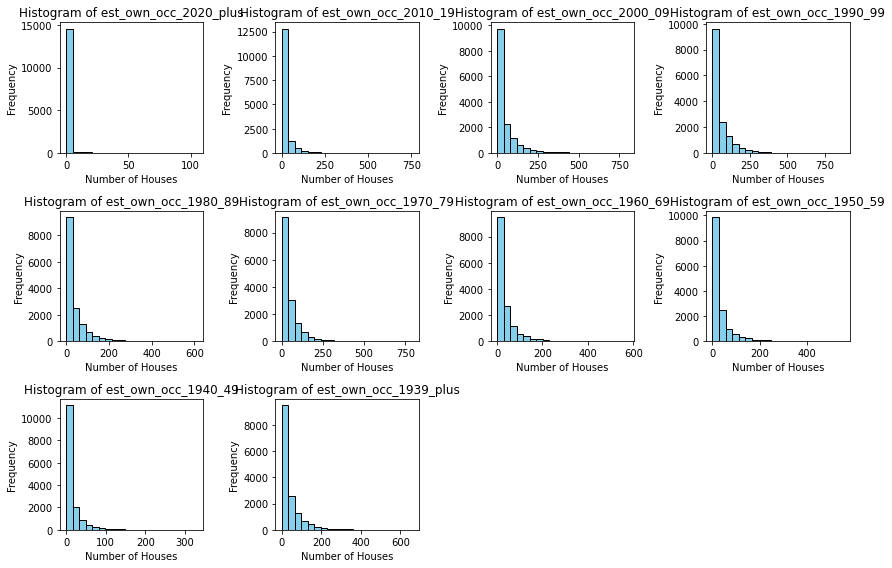

In [56]:
# Select the 'est_own_occ_*' columns for plotting years built data
built_columns = ['est_own_occ_2020_plus', 'est_own_occ_2010_19', 'est_own_occ_2000_09', 
                 'est_own_occ_1990_99', 'est_own_occ_1980_89', 'est_own_occ_1970_79', 
                 'est_own_occ_1960_69', 'est_own_occ_1950_59', 'est_own_occ_1940_49', 
                 'est_own_occ_1939_plus']

#Change the field to numeric
df['est_own_occ_2000_09'] = pd.to_numeric(df['est_own_occ_2000_09'], errors='raise').astype('Int64')

# Plotting histogram for each column
plt.figure(figsize=(12, 8))

# Loop through each column to plot its histogram
for i, col in enumerate(built_columns, start=1):
    plt.subplot(3, 4, i)  # Create subplots (3 rows, 4 columns)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')  # Create histogram
    plt.title(f'Histogram of {col}')
    plt.xlabel('Number of Houses')
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [57]:
#Columns representing number of houses built in various year ranges
built_columns = ['est_own_occ_2020_plus', 'est_own_occ_2010_19', 'est_own_occ_2000_09', 
                 'est_own_occ_1990_99', 'est_own_occ_1980_89', 'est_own_occ_1970_79', 
                 'est_own_occ_1960_69', 'est_own_occ_1950_59', 'est_own_occ_1940_49', 
                 'est_own_occ_1939_plus']

# Define the year brackets corresponding to each column
year_brackets = {
    'est_own_occ_1939_plus': (1930, 1939),
    'est_own_occ_1940_49': (1940, 1949),
    'est_own_occ_1950_59': (1950, 1959),
    'est_own_occ_1960_69': (1960, 1969),
    'est_own_occ_1970_79': (1970, 1979),
    'est_own_occ_1980_89': (1980, 1989),
    'est_own_occ_1990_99': (1990, 1999),
    'est_own_occ_2000_09': (2000, 2009),
    'est_own_occ_2010_19': (2010, 2019),
    'est_own_occ_2020_plus': (2020, None),  
}

# Function to generate synthetic samples and calculate median age for each record
def generate_synthetic_ages(row, current_year):
    synthetic_ages = []
    
    # Dynamically adjust the 2020_plus year range based on the current_year
    year_brackets['est_built_2020_plus'] = (2020, current_year)
    
    for col in built_columns:
        # Get the number of houses in this year range for the record
        num_houses = row[col]
        
        if num_houses > 0:  # Only process if there are houses in this year range
            start_year, end_year = year_brackets[col]
            
            # Handle case where end_year is None (for est_built_2020_plus column)
            if end_year is None:
                end_year = current_year  # Use current year in record within dataset as the upper bound
            
            # Generate synthetic sample years for this year range
            synthetic_years = np.random.randint(start_year, end_year + 1, num_houses)
            
            # Calculate ages of each synthetic house (current_year - year_built)
            synthetic_ages.extend(current_year - synthetic_years)
    
    # Calculate and return the median age of the synthetic samples
    return np.median(synthetic_ages) if synthetic_ages else np.nan  # Return NaN if no valid samples

# Apply this function to each row of the dataframe dynamically based on the year column
df['median_age'] = df.apply(lambda row: generate_synthetic_ages(row, row['year']), axis=1)

# Check the resulting dataframe with median ages
print(df[['geo_id', 'year', 'median_age']].head())


                  geo_id  year  median_age
0  1500000US290019501001  2020        36.0
1  1500000US290019501002  2020        38.0
2  1500000US290019501003  2020        44.0
3  1500000US290019502001  2020        49.0
4  1500000US290019502002  2020        35.0


In [58]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15093 non-null  float64
 2   est_total_not_in_labor_force  15093 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_2020_plus         15093 non-null  int64  
 6   est_own_occ_2010_19           15093 non-null  int64  
 7   est_own_occ_2000_09           15093 non-null  Int64  
 8   est_own_occ_1990_99           15093 non-null  int64  
 9   est_own_occ_1980_89           15093 non-null  int64  
 10  est_own_occ_1970_79           15093 non-null  int64  
 11  est_own_occ_1960_69           15093 non-null  int64  
 12  est_own_occ_1950_59           15093 non-null  int64  
 13  e

In [59]:
#columns to drop
columns_to_drop = [
    'est_own_occ_2020_plus', 'est_own_occ_2010_19', 'est_own_occ_2000_09', 
                 'est_own_occ_1990_99', 'est_own_occ_1980_89', 'est_own_occ_1970_79', 
                 'est_own_occ_1960_69', 'est_own_occ_1950_59', 'est_own_occ_1940_49', 
                 'est_own_occ_1939_plus'
]

# Drop all the listed columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15093 non-null  float64
 2   est_total_not_in_labor_force  15093 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_kit_complete      15093 non-null  float64
 6   est_own_occ_plumb_complete    15093 non-null  float64
 7   est_median_rooms_owner        15093 non-null  float64
 8   est_mortgage_debt             15093 non-null  float64
 9   ipr                           15093 non-null  float64
 10  median_bedrooms               15093 non-null  float64
 11  median_age                    14848 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 1.4+ MB


In [60]:
#fill NA with 0 wherever we have no owner occupied housing units
df['median_age'] = df['median_age'].fillna(0)

In [61]:
#check info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15093 entries, 0 to 15092
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geo_id                       15093 non-null  object 
 1   year                         15093 non-null  int64  
 2   shannon_index                15093 non-null  float64
 3   simpsons_index               15093 non-null  float64
 4   richness                     15093 non-null  float64
 5   simpson_dominance            15093 non-null  float64
 6   berger_parker_dominance      15093 non-null  float64
 7   simpson_evenness             15093 non-null  float64
 8   hispanic_or_latino           15093 non-null  float64
 9   asian                        15093 non-null  float64
 10  black                        15093 non-null  float64
 11  native                       15093 non-null  float64
 12  other                        15093 non-null  float64
 13  pac_isl         

In [62]:
# Perform the inner join on 'geo_id' and 'year'
merged_df_selected = pd.merge(df, merged_df, on=['geo_id', 'year'], how='inner')

# Check the resulting dataframe
merged_df_selected.head()


geo_id  est_tot_civilian_unemployed  \
0  1500000US290019501001                     0.000000   
1  1500000US290019501002                     0.131649   
2  1500000US290019501003                     0.010444   
3  1500000US290019502001                     0.045584   
4  1500000US290019502002                     0.062500   

   est_total_not_in_labor_force  year  est_own_occ  est_own_occ_kit_complete  \
0                      0.383946  2020          435                  0.967816   
1                      0.343805  2020          453                  1.000000   
2                      0.495389  2020          303                  0.960396   
3                      0.503536  2020          259                  0.938224   
4                      0.418182  2020          332                  0.990964   

   est_own_occ_plumb_complete  est_median_rooms_owner  est_mortgage_debt  \
0                    0.967816                     7.0           0.436782   
1                    1.000000                     6.0           0.415011   
2                    0.970297                     6.0           0.458746   
3                    0.938224                     6.0           0.386100   
4                    1.000000                     7.0           0.340361   

        ipr  ...  weighted_education_score  higher_education_proportion  \
0  0.256388  ...                      4.76                         0.21   
1  0.271612  ...                      5.11                         0.28   
2  0.202358  ...                      4.77                         0.16   
3  0.167413  ...                      4.48                         0.13   
4  0.205064  ...                      5.37                         0.31   

   education_score_category  median_income  gini_coefficient  median_value  \
0                    Medium        56313.0              0.48        142300   
1                    Medium        57167.0              0.47        148300   
2                    Medium        48409.0              0.50         86100   
3                       Low        34911.0              0.47         75300   
4                    Medium        54141.0              0.50         92300   

   pct_occupied  pct_vacant  pct_owner_occupied  pct_rental  
0         77.11       22.89               97.10        2.90  
1         85.01       14.99               87.79       12.21  
2         67.74       32.26               89.64       10.36  
3         74.82       25.18               82.22       17.78  
4         68.92       31.08               88.06       11.94  

[5 rows x 37 columns]

In [63]:
#check info
merged_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15093 entries, 0 to 15092
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15093 non-null  float64
 2   est_total_not_in_labor_force  15093 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_kit_complete      15093 non-null  float64
 6   est_own_occ_plumb_complete    15093 non-null  float64
 7   est_median_rooms_owner        15093 non-null  float64
 8   est_mortgage_debt             15093 non-null  float64
 9   ipr                           15093 non-null  float64
 10  median_bedrooms               15093 non-null  float64
 11  median_age                    15093 non-null  float64
 12  shannon_index                 15093 non-null  float64
 13  s

In [64]:
#drop vacant and rental columns as we already have occupied and owner occupied which are just the opposite of these cols
columns_to_drop = [
    'pct_vacant','pct_rental'
]

# Drop all the listed columns from the DataFrame
merged_df_selected.drop(columns=columns_to_drop, inplace=True)

# check the result
merged_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15093 entries, 0 to 15092
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15093 non-null  float64
 2   est_total_not_in_labor_force  15093 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_kit_complete      15093 non-null  float64
 6   est_own_occ_plumb_complete    15093 non-null  float64
 7   est_median_rooms_owner        15093 non-null  float64
 8   est_mortgage_debt             15093 non-null  float64
 9   ipr                           15093 non-null  float64
 10  median_bedrooms               15093 non-null  float64
 11  median_age                    15093 non-null  float64
 12  shannon_index                 15093 non-null  float64
 13  s

In [65]:
#import tigerline shape file

# Read MO shape file
db = geopandas.read_file("tl_2023_29_bg.shp")

#rename geo_id
db = db.rename(columns={'GEOIDFQ': 'geo_id'})

In [66]:
#merge the shapefile with out actual df and pull area of land
merged_df_selected = pd.merge(merged_df_selected, db[['geo_id', 'ALAND']], on='geo_id', how='inner')

In [67]:
#get info
merged_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15093 entries, 0 to 15092
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15093 non-null  float64
 2   est_total_not_in_labor_force  15093 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_kit_complete      15093 non-null  float64
 6   est_own_occ_plumb_complete    15093 non-null  float64
 7   est_median_rooms_owner        15093 non-null  float64
 8   est_mortgage_debt             15093 non-null  float64
 9   ipr                           15093 non-null  float64
 10  median_bedrooms               15093 non-null  float64
 11  median_age                    15093 non-null  float64
 12  shannon_index                 15093 non-null  float64
 13  s

In [ ]:
#Create the connection and extract data from 'ethnicity' table
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the ethnicity table
query = "SELECT  * FROM ethnicity where year in (2020,2021,2022);"

# Use pandas to read the SQL query into a DataFrame
try:
    df = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df.shape

I am able to connect to the database
Data extracted successfully!


(15093, 48)

In [69]:
#rename geoid columns to make a join
df = df.rename(columns={'GEOIDFQ': 'geo_id'})

In [70]:
#join and extract total population column to calculate population density
merged_df_selected = pd.merge(merged_df_selected, df[['geo_id', 'est_total','year']], on=['geo_id', 'year'], how='inner')

In [71]:
#check info
merged_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15093 entries, 0 to 15092
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   est_tot_civilian_unemployed   15093 non-null  float64
 2   est_total_not_in_labor_force  15093 non-null  float64
 3   year                          15093 non-null  int64  
 4   est_own_occ                   15093 non-null  int64  
 5   est_own_occ_kit_complete      15093 non-null  float64
 6   est_own_occ_plumb_complete    15093 non-null  float64
 7   est_median_rooms_owner        15093 non-null  float64
 8   est_mortgage_debt             15093 non-null  float64
 9   ipr                           15093 non-null  float64
 10  median_bedrooms               15093 non-null  float64
 11  median_age                    15093 non-null  float64
 12  shannon_index                 15093 non-null  float64
 13  s

In [72]:
#create the pop density column. Area is in square meters so calculating pop density per square mile
merged_df_selected['area_land'] = merged_df_selected['ALAND']/1000000
merged_df_selected['area_land'] = merged_df_selected['area_land']/2.58999
merged_df_selected['pop_density'] = merged_df_selected['est_total']/merged_df_selected['area_land']
merged_df_selected['pop_density'] = merged_df_selected['pop_density'].round(0)

In [73]:
#now drop unwanted columns
merged_df_selected = merged_df_selected.drop('area_land',axis =1)
merged_df_selected = merged_df_selected.drop('ALAND',axis =1)
merged_df_selected = merged_df_selected.drop('est_total',axis =1)

In [74]:
#drop categorical data for education as we can use weighted education or higher education score.
merged_df_selected = merged_df_selected.drop('education_score_category',axis =1)
#Change the median value from int to float
merged_df_selected['median_value'] = pd.to_numeric(merged_df_selected['median_value'], errors='raise').astype(float)


#Create subsets
subset_2020 = merged_df_selected[merged_df_selected['year'] == 2020]
subset_2021 = merged_df_selected[merged_df_selected['year'] == 2021]
subset_2022 = merged_df_selected[merged_df_selected['year'] == 2022]

#drop year column
subset_2020 = subset_2020.drop(columns=['year'])
subset_2021 = subset_2021.drop(columns=['year'])
subset_2022 = subset_2022.drop(columns=['year'])



In [75]:
#Check 2022 data info
subset_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 2 to 15092
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        5031 non-null   object 
 1   est_tot_civilian_unemployed   5031 non-null   float64
 2   est_total_not_in_labor_force  5031 non-null   float64
 3   est_own_occ                   5031 non-null   int64  
 4   est_own_occ_kit_complete      5031 non-null   float64
 5   est_own_occ_plumb_complete    5031 non-null   float64
 6   est_median_rooms_owner        5031 non-null   float64
 7   est_mortgage_debt             5031 non-null   float64
 8   ipr                           5031 non-null   float64
 9   median_bedrooms               5031 non-null   float64
 10  median_age                    5031 non-null   float64
 11  shannon_index                 5031 non-null   float64
 12  simpsons_index                5031 non-null   float64
 13  ri

In [76]:
#drop geo_id 
subset_2022 = subset_2022.drop('geo_id',axis =1)


#check sample
subset_2022.head()

est_tot_civilian_unemployed  est_total_not_in_labor_force  est_own_occ  \
2                      0.026981                      0.363050          405   
5                      0.158522                      0.366792          523   
8                      0.010178                      0.471774          275   
11                     0.044601                      0.423545          273   
14                     0.033573                      0.487085          332   

    est_own_occ_kit_complete  est_own_occ_plumb_complete  \
2                   1.000000                    1.000000   
5                   1.000000                    1.000000   
8                   0.960000                    0.989091   
11                  1.000000                    1.000000   
14                  0.990964                    1.000000   

    est_median_rooms_owner  est_mortgage_debt       ipr  median_bedrooms  \
2                      6.0           0.545679  0.226664              3.0   
5                      6.0           0.474187  0.310705              3.0   
8                      6.0           0.414545  0.192767              3.0   
11                     6.0           0.388278  0.196104              3.0   
14                     7.0           0.367470  0.205569              3.0   

    median_age  ...  white  gini_education  weighted_education_score  \
2         39.0  ...  1.000            0.39                      5.08   
5         32.0  ...  1.000            0.56                      4.98   
8         45.0  ...  0.988            0.56                      4.88   
11        56.0  ...  0.997            0.49                      4.66   
14        34.0  ...  1.000            0.58                      5.27   

    higher_education_proportion  median_income  gini_coefficient  \
2                          0.25        80208.0              0.46   
5                          0.23        64196.0              0.49   
8                          0.18        52438.0              0.51   
11                         0.15        46000.0              0.48   
14                         0.27        64063.0              0.49   

    median_value  pct_occupied  pct_owner_occupied  pop_density  
2       178900.0         74.00               94.85         12.0  
5       167100.0         88.44               85.46         17.0  
8        94700.0         70.60               86.75         15.0  
11       89300.0         66.94               84.78         32.0  
14      157600.0         74.41               87.83          9.0  

[5 rows x 33 columns]

In [77]:
#subset data by removing 0 median values where there are no owner occupied housing units
subset_2022 = subset_2022[subset_2022['median_value'] != 0]
subset_2022 = subset_2022[subset_2022['median_value'] <= 1000000]

In [78]:
#check info
subset_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4937 entries, 2 to 15089
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   est_tot_civilian_unemployed   4937 non-null   float64
 1   est_total_not_in_labor_force  4937 non-null   float64
 2   est_own_occ                   4937 non-null   int64  
 3   est_own_occ_kit_complete      4937 non-null   float64
 4   est_own_occ_plumb_complete    4937 non-null   float64
 5   est_median_rooms_owner        4937 non-null   float64
 6   est_mortgage_debt             4937 non-null   float64
 7   ipr                           4937 non-null   float64
 8   median_bedrooms               4937 non-null   float64
 9   median_age                    4937 non-null   float64
 10  shannon_index                 4937 non-null   float64
 11  simpsons_index                4937 non-null   float64
 12  richness                      4937 non-null   float64
 13  si

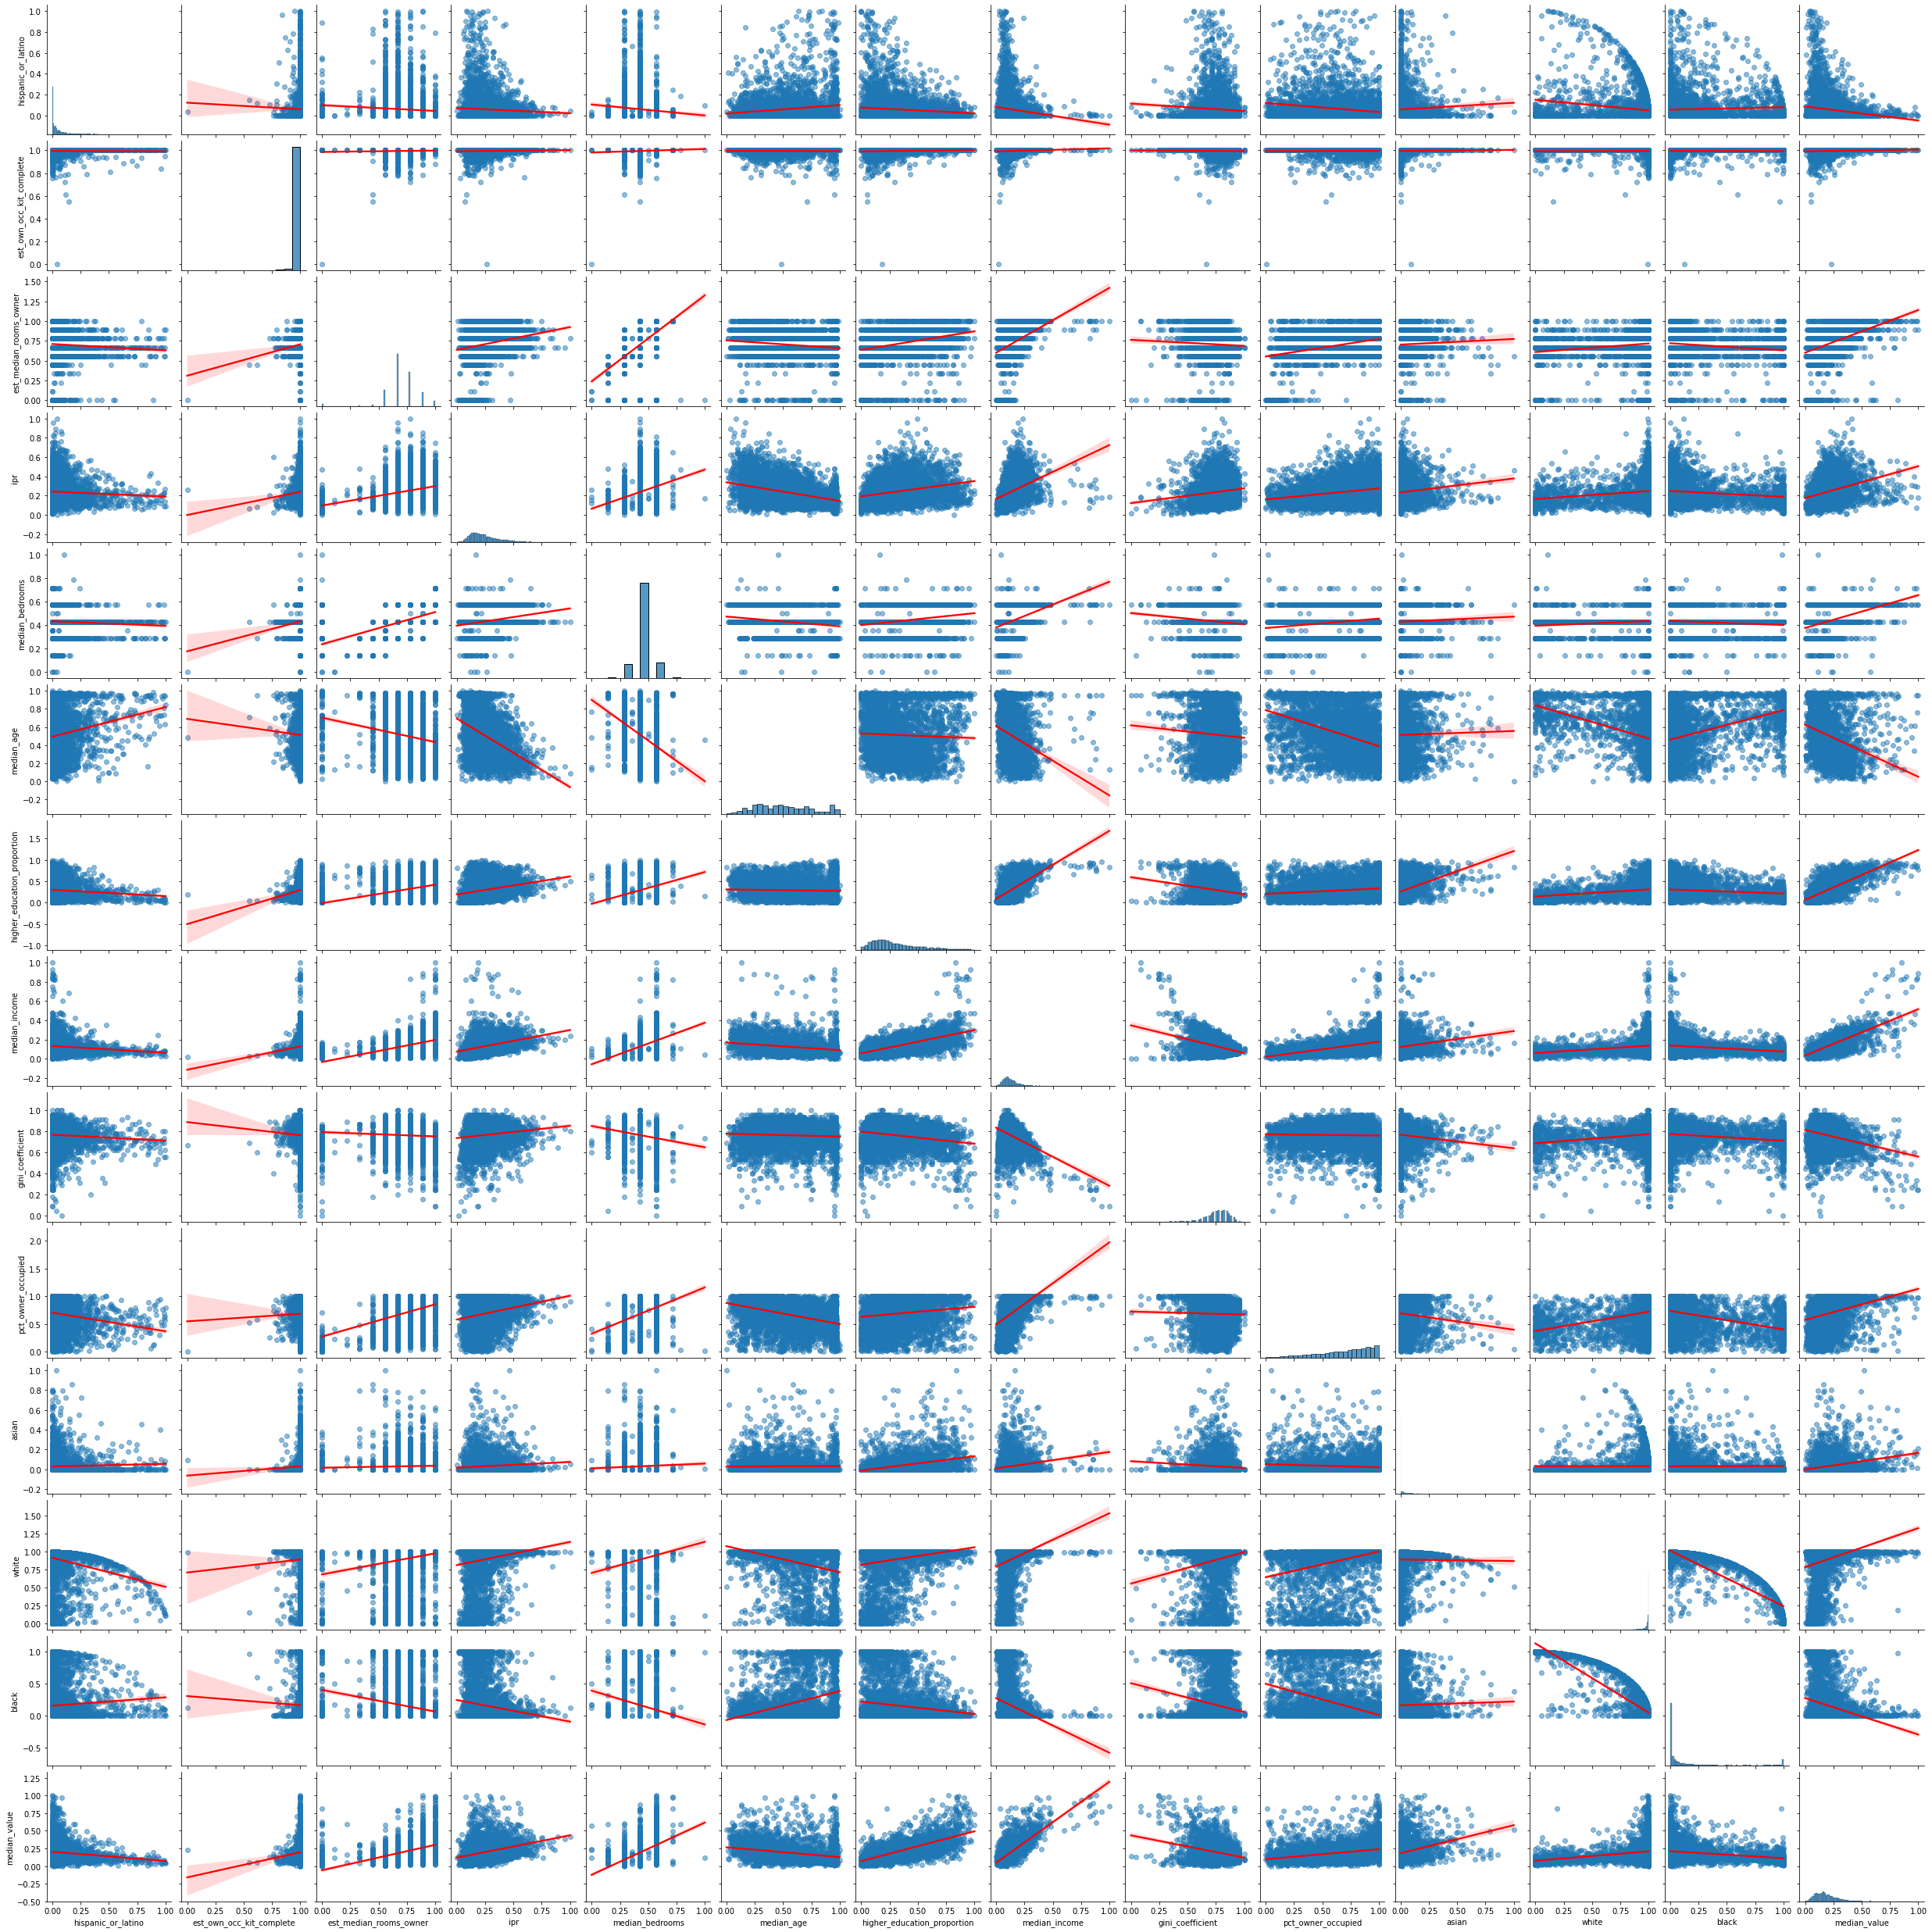

In [79]:
# List of few selected columns for the pair plot to understand how distributions are within data
columns_to_plot = [
    'hispanic_or_latino', 'est_own_occ_kit_complete',
    'est_median_rooms_owner', 'ipr', 'median_bedrooms', 
    'median_age', 'higher_education_proportion', 'median_income', 'gini_coefficient', 
     'pct_owner_occupied','asian','white','black','median_value'
]



# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns to scale them
scaled_data = scaler.fit_transform(subset_2022[columns_to_plot])

# Convert the scaled data back to a DataFrame with the original column names
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_plot)

# Generate the pair plot for the scaled data
sns.pairplot(scaled_df, kind='reg', plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.show()

In [80]:
#check sample
subset_2022.head()

est_tot_civilian_unemployed  est_total_not_in_labor_force  est_own_occ  \
2                      0.026981                      0.363050          405   
5                      0.158522                      0.366792          523   
8                      0.010178                      0.471774          275   
11                     0.044601                      0.423545          273   
14                     0.033573                      0.487085          332   

    est_own_occ_kit_complete  est_own_occ_plumb_complete  \
2                   1.000000                    1.000000   
5                   1.000000                    1.000000   
8                   0.960000                    0.989091   
11                  1.000000                    1.000000   
14                  0.990964                    1.000000   

    est_median_rooms_owner  est_mortgage_debt       ipr  median_bedrooms  \
2                      6.0           0.545679  0.226664              3.0   
5                      6.0           0.474187  0.310705              3.0   
8                      6.0           0.414545  0.192767              3.0   
11                     6.0           0.388278  0.196104              3.0   
14                     7.0           0.367470  0.205569              3.0   

    median_age  ...  white  gini_education  weighted_education_score  \
2         39.0  ...  1.000            0.39                      5.08   
5         32.0  ...  1.000            0.56                      4.98   
8         45.0  ...  0.988            0.56                      4.88   
11        56.0  ...  0.997            0.49                      4.66   
14        34.0  ...  1.000            0.58                      5.27   

    higher_education_proportion  median_income  gini_coefficient  \
2                          0.25        80208.0              0.46   
5                          0.23        64196.0              0.49   
8                          0.18        52438.0              0.51   
11                         0.15        46000.0              0.48   
14                         0.27        64063.0              0.49   

    median_value  pct_occupied  pct_owner_occupied  pop_density  
2       178900.0         74.00               94.85         12.0  
5       167100.0         88.44               85.46         17.0  
8        94700.0         70.60               86.75         15.0  
11       89300.0         66.94               84.78         32.0  
14      157600.0         74.41               87.83          9.0  

[5 rows x 33 columns]

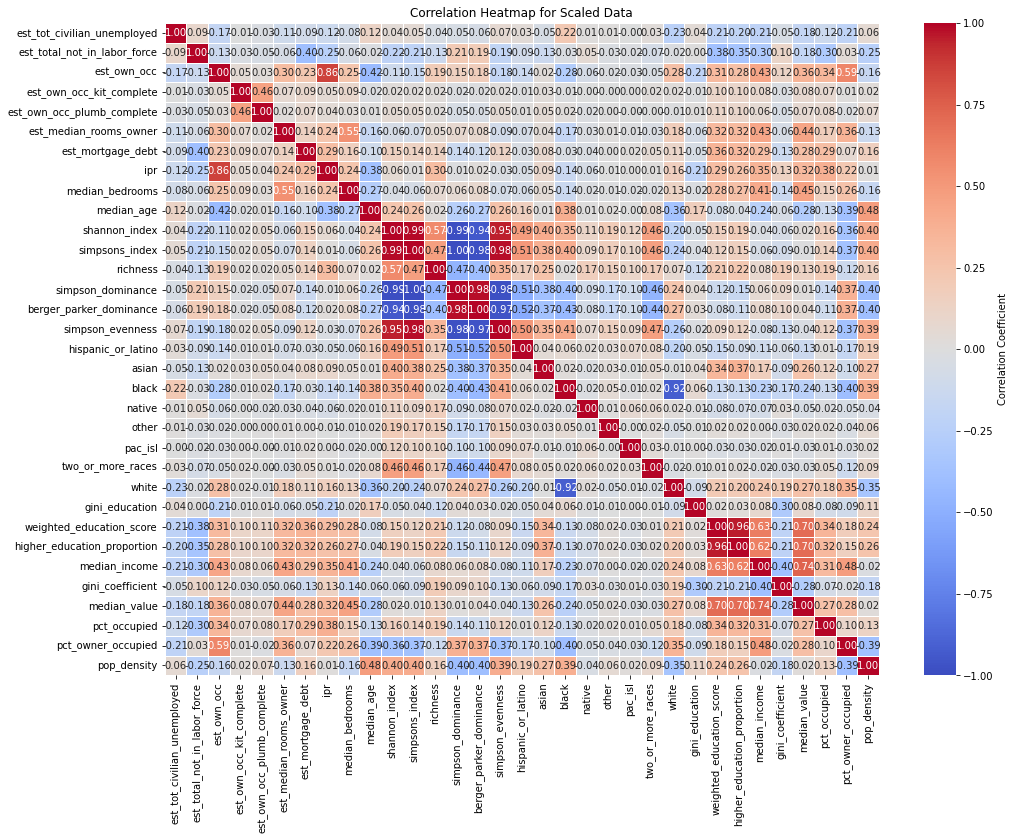

In [81]:
#scale the data
scaled_data2 = scaler.fit_transform(subset_2022)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df2 = pd.DataFrame(scaled_data2, columns=subset_2022.columns)

#create correlation matrix
correlation_matrix = scaled_df2.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap for Scaled Data')
plt.show()

* Drop 'shannon_index','berger_parker_dominance','simpson_dominance','simpson_evenness','other', 'pac_isl', 'native','two_or_more_races','higher_education_proportion' columns as we have these highly positively or negatively correlated to other columns . Also few race columns are very less in proportion and so excluding those as well.
* Drop 'median_value' as well because it is our dependent variable

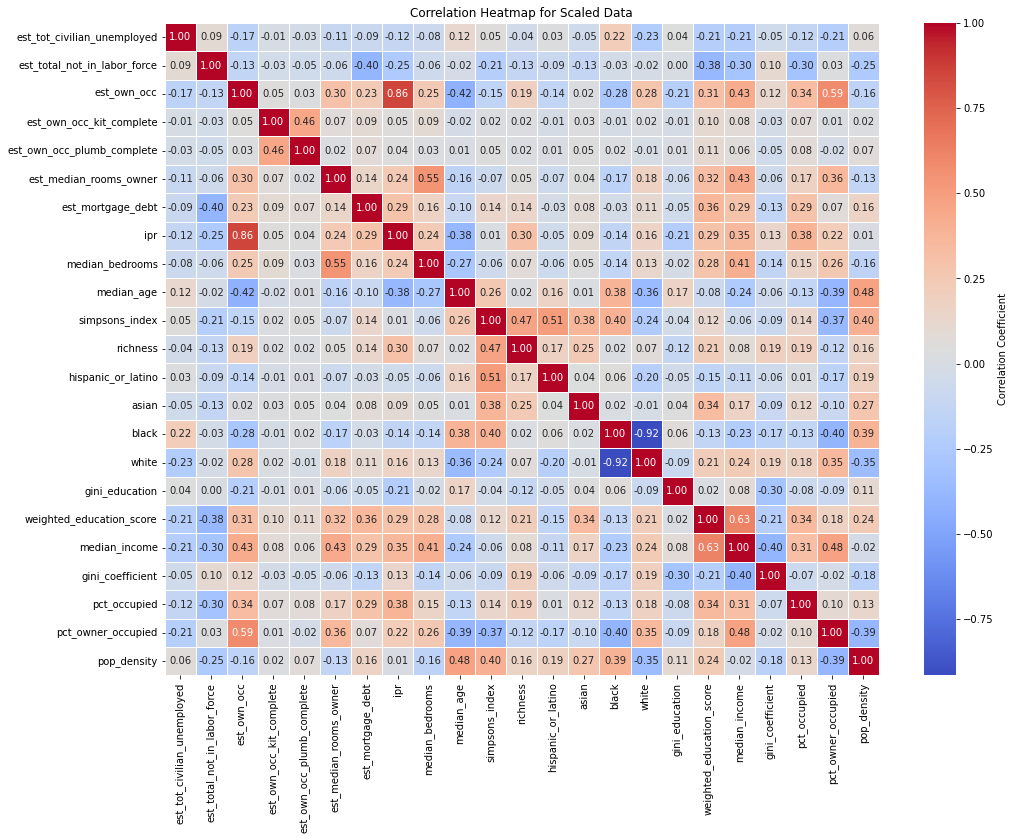

In [82]:
# create X and y variables for building regression model
X = subset_2022.drop(columns=['shannon_index','berger_parker_dominance','simpson_dominance','simpson_evenness','median_value','other', 'pac_isl', 'native','two_or_more_races','higher_education_proportion']) 

y = subset_2022['median_value'] 

#scale X columns
scaled_data = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

#create correlation matrix again
correlation_matrix = scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap for Scaled Data')
plt.show()

* We observe that there is negative correlation with white and black race groups in the blockgroups which is suggesting that the blockgroups are distinctly different for these two race groups

In [83]:
#Check sample
X.head()

est_tot_civilian_unemployed  est_total_not_in_labor_force  est_own_occ  \
2                      0.026981                      0.363050          405   
5                      0.158522                      0.366792          523   
8                      0.010178                      0.471774          275   
11                     0.044601                      0.423545          273   
14                     0.033573                      0.487085          332   

    est_own_occ_kit_complete  est_own_occ_plumb_complete  \
2                   1.000000                    1.000000   
5                   1.000000                    1.000000   
8                   0.960000                    0.989091   
11                  1.000000                    1.000000   
14                  0.990964                    1.000000   

    est_median_rooms_owner  est_mortgage_debt       ipr  median_bedrooms  \
2                      6.0           0.545679  0.226664              3.0   
5                      6.0           0.474187  0.310705              3.0   
8                      6.0           0.414545  0.192767              3.0   
11                     6.0           0.388278  0.196104              3.0   
14                     7.0           0.367470  0.205569              3.0   

    median_age  ...  asian  black  white  gini_education  \
2         39.0  ...  0.000  0.000  1.000            0.39   
5         32.0  ...  0.004  0.000  1.000            0.56   
8         45.0  ...  0.000  0.001  0.988            0.56   
11        56.0  ...  0.014  0.000  0.997            0.49   
14        34.0  ...  0.000  0.000  1.000            0.58   

    weighted_education_score  median_income  gini_coefficient  pct_occupied  \
2                       5.08        80208.0              0.46         74.00   
5                       4.98        64196.0              0.49         88.44   
8                       4.88        52438.0              0.51         70.60   
11                      4.66        46000.0              0.48         66.94   
14                      5.27        64063.0              0.49         74.41   

    pct_owner_occupied  pop_density  
2                94.85         12.0  
5                85.46         17.0  
8                86.75         15.0  
11               84.78         32.0  
14               87.83          9.0  

[5 rows x 23 columns]

In [84]:
#check shape
X.shape

(4937, 23)

In [85]:
y.shape

(4937,)

# PCA

In [86]:


# Perform PCA on the scaled data
pca = PCA()
pca.fit(scaled_data)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)

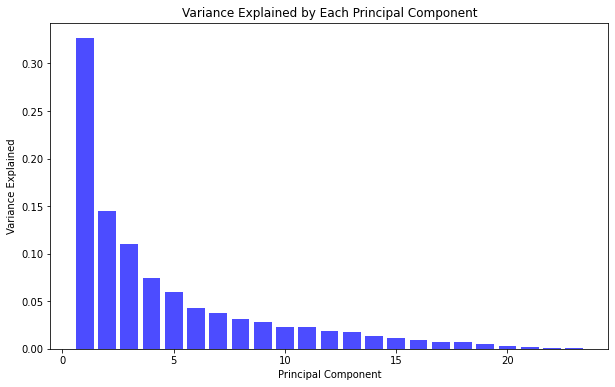

In [87]:
# Plot the explained variance by each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.show()


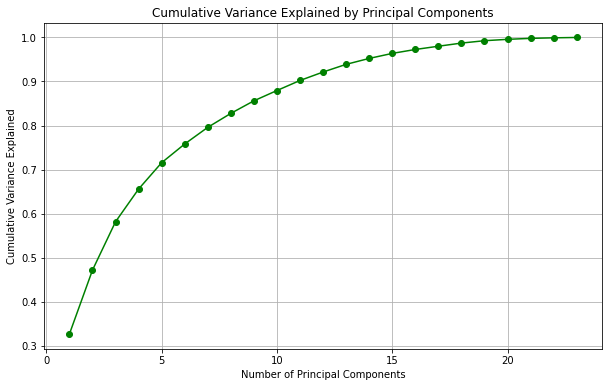

In [88]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()


10 PCA components explain nearly 90% of variance in data

# Linear regression with PCA

In [89]:
#create pca with 10 components and perform linear regression
pca = PCA(n_components=10)

#fit PCA
X_pca = pca.fit_transform(scaled_data)

In [91]:
# Now, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# R-squared (R²) value
r_squared = linear_model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

Mean Squared Error: 6028075236.205895
R-squared: 0.6021448829731592


* we see that PCA with 10 components explaining 90% variance gives only 60% R-squared value possibly due to non-linearity as we know based on pairplot, few of the attributes are having non linear relationships. 

# Feature Importance using Random Forest

In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': scaled_df.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
top_features_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Mean Squared Error: 4216631985.87
Root Mean Squared Error: 64935.60


In [93]:
# Display the features DataFrame
top_features_df

Feature  Importance
18                 median_income    0.396902
17      weighted_education_score    0.251282
9                     median_age    0.064537
1   est_total_not_in_labor_force    0.031495
21            pct_owner_occupied    0.028222
8                median_bedrooms    0.027786
5         est_median_rooms_owner    0.026286
6              est_mortgage_debt    0.021485
22                   pop_density    0.019228
19              gini_coefficient    0.015574
20                  pct_occupied    0.015348
16                gini_education    0.013796
2                    est_own_occ    0.013661
7                            ipr    0.012772
13                         asian    0.011149
15                         white    0.009153
0    est_tot_civilian_unemployed    0.008999
10                simpsons_index    0.008980
14                         black    0.008420
12            hispanic_or_latino    0.007615
11                      richness    0.004466
4     est_own_occ_plumb_complete    0.001572
3       est_own_occ_kit_complete    0.001271

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': scaled_df.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
top_features_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Mean Squared Error: 4229242100.32
Root Mean Squared Error: 65032.62


In [95]:
# Display the features DataFrame
top_features_df

Feature  Importance
18                 median_income    0.415172
17      weighted_education_score    0.236278
9                     median_age    0.063769
1   est_total_not_in_labor_force    0.032372
21            pct_owner_occupied    0.028058
8                median_bedrooms    0.026552
5         est_median_rooms_owner    0.024531
6              est_mortgage_debt    0.021085
22                   pop_density    0.020071
19              gini_coefficient    0.015962
20                  pct_occupied    0.015460
2                    est_own_occ    0.013286
16                gini_education    0.013238
7                            ipr    0.012972
13                         asian    0.011519
10                simpsons_index    0.009180
0    est_tot_civilian_unemployed    0.008999
15                         white    0.008690
14                         black    0.008334
12            hispanic_or_latino    0.007069
11                      richness    0.004792
4     est_own_occ_plumb_complete    0.001345
3       est_own_occ_kit_complete    0.001267

In [96]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': scaled_df.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
top_features_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Mean Squared Error: 4235089221.36
Root Mean Squared Error: 65077.56


In [97]:
# Display the features DataFrame
top_features_df

Feature  Importance
18                 median_income    0.396138
17      weighted_education_score    0.251556
9                     median_age    0.064898
1   est_total_not_in_labor_force    0.031024
21            pct_owner_occupied    0.028236
8                median_bedrooms    0.027502
5         est_median_rooms_owner    0.026836
6              est_mortgage_debt    0.021098
22                   pop_density    0.019359
19              gini_coefficient    0.015814
20                  pct_occupied    0.015423
16                gini_education    0.014091
2                    est_own_occ    0.013987
7                            ipr    0.012685
13                         asian    0.010761
15                         white    0.009053
10                simpsons_index    0.008875
0    est_tot_civilian_unemployed    0.008820
14                         black    0.008792
12            hispanic_or_latino    0.007640
11                      richness    0.004463
4     est_own_occ_plumb_complete    0.001616
3       est_own_occ_kit_complete    0.001331

All these 3 iterations with 100, 500 and 1000 estimators gave top 10 estimators in same order and let us see what we can extract out of Recursive feature elimination

# Recursive Feature Elimination

In [98]:
# Fit RFE on the original 2022 X_train data, not X_train_selected and extract 10 features


selector = RFE(estimator=RandomForestRegressor(n_estimators=500,random_state=42), n_features_to_select=10)
selector.fit(X_train, y_train)  # Fit on the full original data and selecter by defaults uses importance_getter='auto' which takes feature importance into consideration

# Get the column names of the selected features
selected_features = X_train.columns[selector.support_]

# Print the selected feature names
print("Selected features:", selected_features)

Selected features: Index(['est_total_not_in_labor_force', 'est_own_occ', 'est_median_rooms_owner',
       'est_mortgage_debt', 'median_bedrooms', 'median_age',
       'weighted_education_score', 'median_income', 'pct_owner_occupied',
       'pop_density'],
      dtype='object')


In [99]:
# List of selected columns for the pair plot

columns_to_plot = [
    'pop_density', 'est_total_not_in_labor_force',
    'est_median_rooms_owner', 'est_mortgage_debt', 'median_bedrooms', 
    'median_age', 'median_income', 'weighted_education_score', 
     'pct_owner_occupied','median_value','est_own_occ'
]


scaled_df2 = pd.DataFrame(X, columns=columns_to_plot)
scaled_df2['median_value'] = y 
scaled_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4937 entries, 2 to 15089
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pop_density                   4937 non-null   float64
 1   est_total_not_in_labor_force  4937 non-null   float64
 2   est_median_rooms_owner        4937 non-null   float64
 3   est_mortgage_debt             4937 non-null   float64
 4   median_bedrooms               4937 non-null   float64
 5   median_age                    4937 non-null   float64
 6   median_income                 4937 non-null   float64
 7   weighted_education_score      4937 non-null   float64
 8   pct_owner_occupied            4937 non-null   float64
 9   median_value                  4937 non-null   float64
 10  est_own_occ                   4937 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 462.8 KB


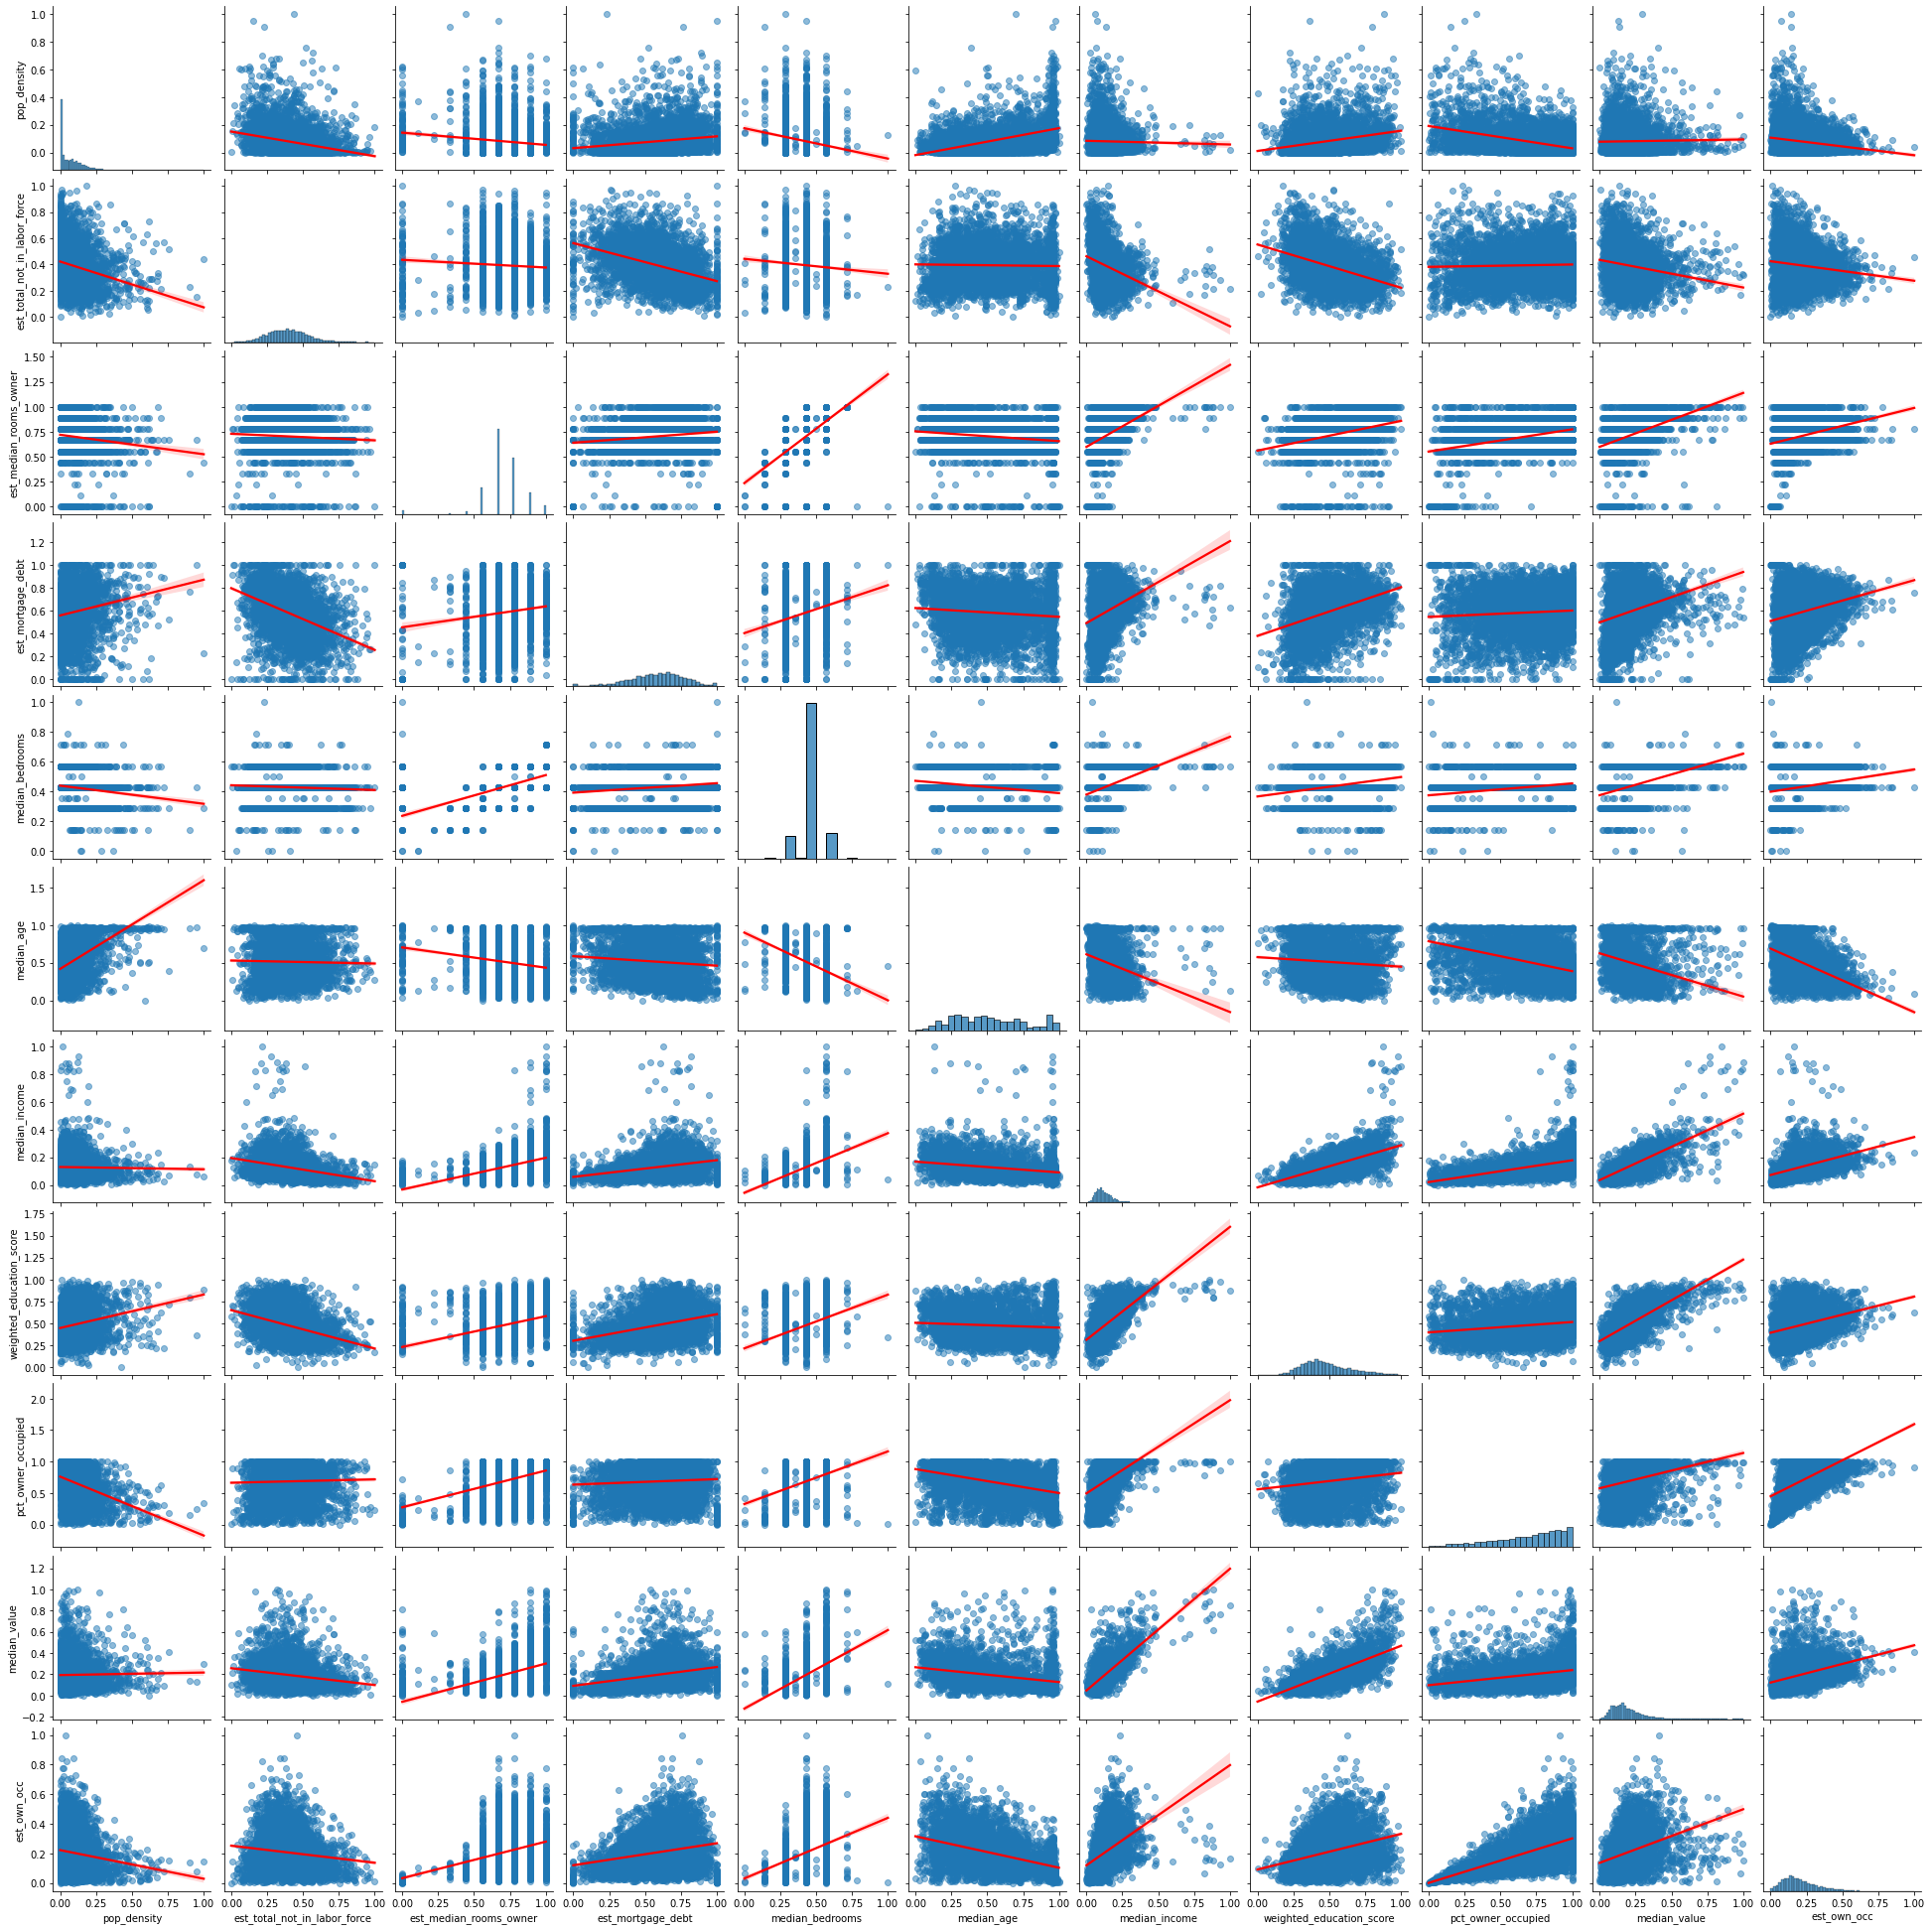

In [100]:
# Generate the pair plot for the scaled data
scaled_df2 = scaler.fit_transform(scaled_df2)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df2 = pd.DataFrame(scaled_df2, columns=columns_to_plot)
                          
sns.pairplot(scaled_df2, kind='reg', plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.show()

In [101]:
# Create DataFrames with selected features from the transformed 2022 data
X_train_rfe = X_train.loc[X_train.index, selected_features]  
X_test_rfe = X_test.loc[X_test.index, selected_features]

# Train the model with selected features on 2022 data
rf_model.fit(X_train_rfe, y_train)

# Make predictions and evaluate
y_pred_rfe = rf_model.predict(X_test_rfe)
best_mse_rfe = mean_squared_error(y_test, y_pred_rfe)
best_rmse_rfe = np.sqrt(best_mse_rfe)

print(f'Root Mean Squared Error with RFE: {best_rmse_rfe:.2f}')

Root Mean Squared Error with RFE: 65714.24


In [102]:
#predict now
r2_rfe = r2_score(y_test, y_pred_rfe)
print(f'R-squared with RFE: {r2_rfe:.2f}')

R-squared with RFE: 0.71


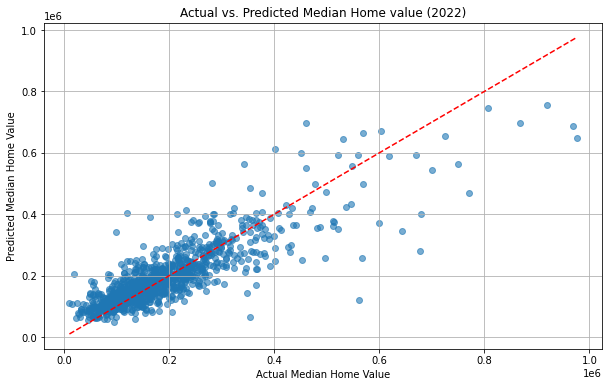

In [103]:

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfe, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2022)')
plt.grid()
plt.show()


In [104]:
#Create 2021 subset and repeat same steps as above to see how model is performing for 2021 year data

subset_2021_cleaned = subset_2021.drop('geo_id',axis =1)

subset_2021_cleaned = subset_2021_cleaned[subset_2021_cleaned['median_value'] != 0]
subset_2021_cleaned = subset_2021_cleaned[subset_2021_cleaned['median_value'] <= 1000000]

# Calculate the correlation matrix for the scaled data
X2 = subset_2021_cleaned.drop(columns=['shannon_index','berger_parker_dominance','simpson_dominance','simpson_evenness','median_value','other', 'pac_isl', 'native','two_or_more_races','higher_education_proportion']) 

y2 = subset_2021_cleaned['median_value'] 

scaled_data2 = scaler.fit_transform(X2)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df2 = pd.DataFrame(scaled_data2, columns=X2.columns)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_df2, y2, test_size=0.2, random_state=42)

# Create DataFrames with selected features from the transformed data
X_train_rfe2 = X_train2.loc[X_train2.index, selected_features]  
X_test_rfe2 = X_test2.loc[X_test2.index, selected_features]

# Train the model with selected features
rf_model.fit(X_train_rfe2, y_train2)

# Make predictions and evaluate
y_pred_rfe2 = rf_model.predict(X_test_rfe2)
best_mse_rfe2 = mean_squared_error(y_test2, y_pred_rfe2)
best_rmse_rfe2 = np.sqrt(best_mse_rfe2)

print(f'Root Mean Squared Error with RFE: {best_rmse_rfe2:.2f}')

r2_rfe2 = r2_score(y_test2, y_pred_rfe2)
print(f'R-squared with RFE: {r2_rfe2:.2f}')

Root Mean Squared Error with RFE: 55242.31
R-squared with RFE: 0.73


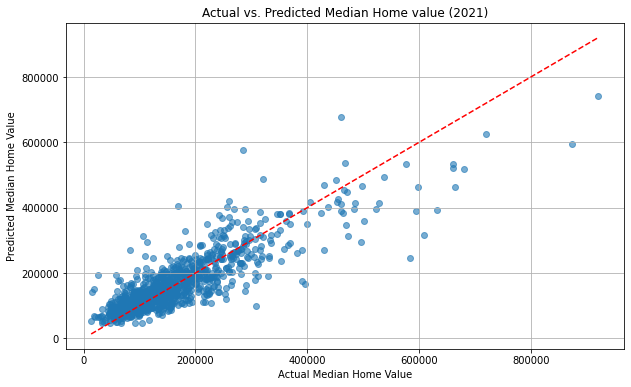

In [105]:

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_rfe2, alpha=0.6)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2021)')
plt.grid()
plt.show()


In [106]:
#Create 2020 subset and repeat same steps as above to see how model is performing for 2020 year data

subset_2020_cleaned = subset_2020.drop('geo_id',axis =1)

subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] != 0]
subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] <= 1000000]

# Calculate the correlation matrix for the scaled data
X3 = subset_2020_cleaned.drop(columns=['shannon_index','berger_parker_dominance','simpson_dominance','simpson_evenness','median_value','other', 'pac_isl', 'native','two_or_more_races','higher_education_proportion']) 

y3 = subset_2020_cleaned['median_value'] 

scaled_data3 = scaler.fit_transform(X3)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df3 = pd.DataFrame(scaled_data3, columns=X3.columns)

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(scaled_df3, y3, test_size=0.2, random_state=42)

# Create DataFrames with selected features from the transformed data
X_train_rfe3 = X_train3.loc[X_train3.index, selected_features]  
X_test_rfe3 = X_test3.loc[X_test3.index, selected_features]

# Train the model with selected features
rf_model.fit(X_train_rfe3, y_train3)

# Make predictions and evaluate
y_pred_rfe3 = rf_model.predict(X_test_rfe3)
best_mse_rfe3 = mean_squared_error(y_test3, y_pred_rfe3)
best_rmse_rfe3 = np.sqrt(best_mse_rfe3)

print(f'Root Mean Squared Error with RFE: {best_rmse_rfe3:.2f}')


r2_rfe3 = r2_score(y_test3, y_pred_rfe3)
print(f'R-squared with RFE: {r2_rfe3:.2f}')

Root Mean Squared Error with RFE: 51384.35
R-squared with RFE: 0.73


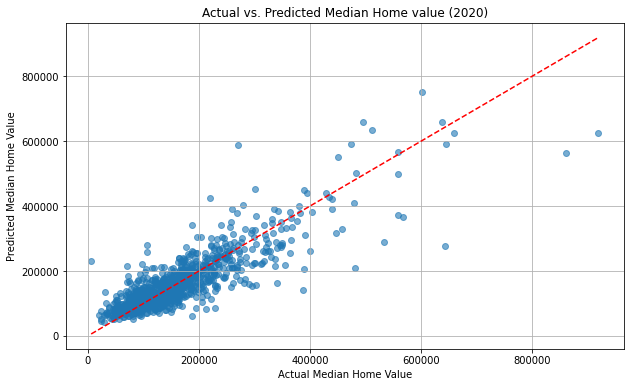

In [107]:

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_pred_rfe3, alpha=0.6)
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2020)')
plt.grid()
plt.show()


The R-Squared values are ranging from 71% to 73% overall for all 3 years datasets and let us do 5-fold cross validation to see if we can improve the R-squared values.

# 5 Fold Cross validation

In [108]:
#Perform 5 fold cross validation on 2020 data


subset_2020_cleaned = subset_2020.drop('geo_id',axis =1)

subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] != 0]
subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] <= 1000000]

# Perform full testing on 2020 data
X3 = subset_2020_cleaned.drop(columns=['shannon_index', 'berger_parker_dominance', 'simpson_dominance', 
                                       'simpson_evenness', 'median_value', 'other', 'pac_isl', 'native', 
                                       'two_or_more_races', 'higher_education_proportion'])
y3 = subset_2020_cleaned['median_value']

# Scale the data
scaled_data3 = scaler.fit_transform(X3)
scaled_df3 = pd.DataFrame(scaled_data3, columns=X3.columns)

# Use the trained model to predict on the entire 2020 data
X_test_full = scaled_df3[selected_features]

y_test_full = y3

y_pred_full = rf_model.predict(X_test_full)

# Calculate metrics for the full test
mse_full = mean_squared_error(y_test_full, y_pred_full)
rmse_full = np.sqrt(mse_full)
r2_full = r2_score(y_test_full, y_pred_full)

print(f"Full Testing Metrics:")
print(f" - RMSE: {rmse_full:.2f}")
print(f" - R-squared: {r2_full:.2f}")

# Perform 5-fold cross-validation on 2020 data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_mse = -cross_val_score(rf_model, X_test_full, y_test_full, cv=kf, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(cv_mse)  # Convert to RMSE

cv_r2 = cross_val_score(rf_model, X_test_full, y_test_full, cv=kf, scoring='r2')

print("\nCross-Validation Metrics (5-Fold):")
print(f" - Average RMSE: {np.mean(cv_rmse):.2f} ± {np.std(cv_rmse):.2f}")
print(f" - Average R-squared: {np.mean(cv_r2):.2f} ± {np.std(cv_r2):.2f}")


Full Testing Metrics:
 - RMSE: 29747.17
 - R-squared: 0.92

Cross-Validation Metrics (5-Fold):
 - Average RMSE: 56670.66 ± 3416.15
 - Average R-squared: 0.70 ± 0.04


**5-fold Cross Validation on 2020 tells us the R-square value would be around 70 to 74% at the best when we use our list of 10 important  variables. We used only one year data as the range of R-Squared is within same values.**

# Hyper Parameter Tuning - Random Forest

In [109]:
#perform hyper parameter tuning


# Define the parameters


param_dist = {
    'n_estimators': randint(630, 660),            # Number of trees
    'min_samples_split': randint(15, 20),           # Min samples to split
    'min_samples_leaf': randint(4, 8),             # Min samples at leaf
    'max_leaf_nodes': randint(40, 60),             # Max leaf nodes
    'max_depth': (22, 30)                
}

    
rf = RandomForestRegressor(random_state=42) 

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                   verbose=1, random_state=42, n_jobs=-1)

# Fit the model for 2020
random_search.fit(X_train_rfe3, y_train3)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': 30, 'max_leaf_nodes': 59, 'min_samples_leaf': 5, 'min_samples_split': 17, 'n_estimators': 655}


For the final model using Random Forest, we are using below as hyper params

**{'max_depth': 30, 'max_leaf_nodes': 59, 'min_samples_leaf': 5, 'min_samples_split': 17, 'n_estimators': 655}**

# List of Parameters tried before concluding above final hyper parameters

* param_dist = {
    'n_estimators': randint(500, 600),            # Number of trees
    'min_samples_split': randint(2, 10),           # Min samples to split
    'min_samples_leaf': randint(1, 5),             # Min samples at leaf
    'max_leaf_nodes': randint(10, 30),             # Max leaf nodes
    'max_depth': [10, 15, 20]                } 

**Best Parameters: {'max_depth': 20, 'max_leaf_nodes': 29, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 571}**

* param_dist = {
    'n_estimators': randint(575, 625),            # Number of trees
    'min_samples_split': randint(6, 12),           # Min samples to split
    'min_samples_leaf': randint(2, 4),             # Min samples at leaf
    'max_leaf_nodes': randint(20, 35),             # Max leaf nodes
    'max_depth': [20, 22, 25]                }

**Best Parameters: {'max_depth': 22, 'max_leaf_nodes': 33, 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 605}**

* param_dist = {
    'n_estimators': randint(610, 645),            # Number of trees
    'min_samples_split': randint(10, 16),           # Min samples to split
    'min_samples_leaf': randint(3, 5),             # Min samples at leaf
    'max_leaf_nodes': randint(33, 45),             # Max leaf nodes
    'max_depth': [23, 26, 29]                }

**Best Parameters: {'max_depth': 23, 'max_leaf_nodes': 44, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 634}**

In [110]:
#Create a new RF model using the best hyper params

rf_model2 = RandomForestRegressor(
    n_estimators=655,             # Best parameter for the number of trees
    max_depth=30,                 # Best parameter for maximum depth of trees
    max_leaf_nodes=59,            # Best parameter for maximum number of leaf nodes
    min_samples_leaf=5,           # Minimum samples required to be a leaf node
    min_samples_split=17,         # Minimum samples required to split a node
    max_features='auto',          # Number of features considered at each split
    bootstrap=True,               # Whether to bootstrap samples
    random_state=42               # For reproducibility
)

Root Mean Squared Error with RFE: 64690.51
R-squared with RFE: 0.72


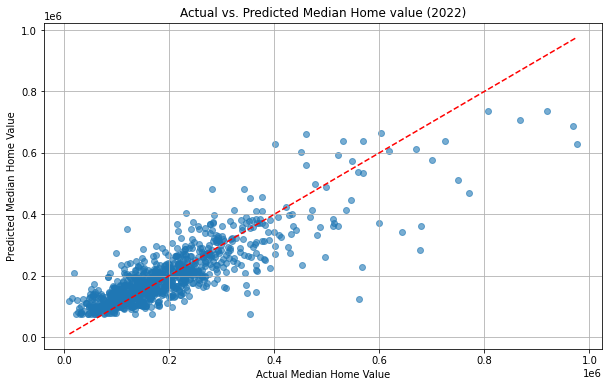

In [111]:
# Train the 2022 model with new rf model
rf_model2.fit(X_train_rfe, y_train)

# Make predictions and evaluate
y_pred_rfe = rf_model2.predict(X_test_rfe)
best_mse_rfe = mean_squared_error(y_test, y_pred_rfe)
best_rmse_rfe = np.sqrt(best_mse_rfe)

print(f'Root Mean Squared Error with RFE: {best_rmse_rfe:.2f}')
#predict now
r2_rfe = r2_score(y_test, y_pred_rfe)
print(f'R-squared with RFE: {r2_rfe:.2f}')

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfe, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2022)')
plt.grid()
plt.show()


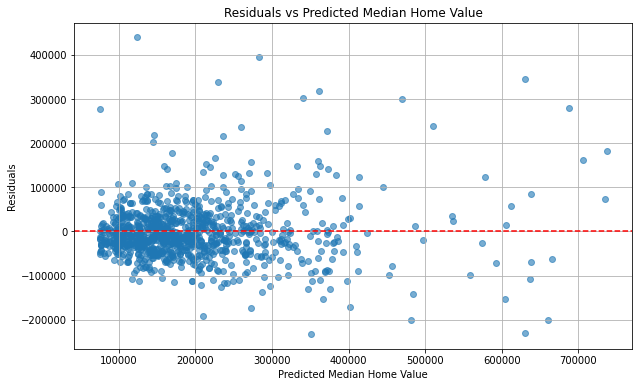

In [112]:
# Calculate residuals
residuals = y_test - y_pred_rfe

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Median Home Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median Home Value')
plt.grid()
plt.show()

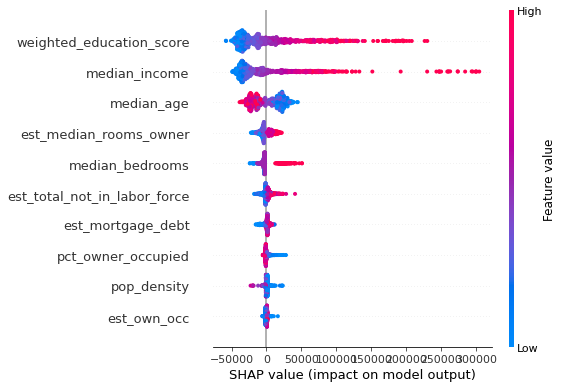

In [113]:



# Create a SHAP explainer for the Random Forest model
explainer_rf = shap.TreeExplainer(rf_model2)

# Compute Shapley values for the test set (scaled and selected features)
shap_values_rf = explainer_rf.shap_values(X_test_rfe)

# Summary Plot
# This plot will show the impact of each feature on the model's predictions across all samples
shap.summary_plot(shap_values_rf, X_test_rfe)

# Force Plot (for a single instance)
# This plot will show the contribution of each feature for a single prediction

shap.initjs()  # Initialize the JavaScript visualization
shap.force_plot(explainer_rf.expected_value[0], shap_values_rf[0], X_test_rfe.iloc[0])


In [114]:
#Create 2021 subset and repeat same steps as above to see how model is performing for 2021 year data

subset_2021_cleaned = subset_2021.drop('geo_id',axis =1)

subset_2021_cleaned = subset_2021_cleaned[subset_2021_cleaned['median_value'] != 0]
subset_2021_cleaned = subset_2021_cleaned[subset_2021_cleaned['median_value'] <= 1000000]

# Calculate the correlation matrix for the scaled data
X2 = subset_2021_cleaned.drop(columns=['shannon_index','berger_parker_dominance','simpson_dominance','simpson_evenness','median_value','other', 'pac_isl', 'native','two_or_more_races','higher_education_proportion']) 

y2 = subset_2021_cleaned['median_value'] 

scaled_data2 = scaler.fit_transform(X2)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df2 = pd.DataFrame(scaled_data2, columns=X2.columns)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_df2, y2, test_size=0.2, random_state=42)

# Create DataFrames with selected features from the transformed data
X_train_rfe2 = X_train2.loc[X_train2.index, selected_features]  
X_test_rfe2 = X_test2.loc[X_test2.index, selected_features]

# Train the model with selected features
rf_model2.fit(X_train_rfe2, y_train2)

# Make predictions and evaluate
y_pred_rfe2 = rf_model2.predict(X_test_rfe2)
best_mse_rfe2 = mean_squared_error(y_test2, y_pred_rfe2)
best_rmse_rfe2 = np.sqrt(best_mse_rfe2)

print(f'Root Mean Squared Error with RFE: {best_rmse_rfe2:.2f}')


r2_rfe2 = r2_score(y_test2, y_pred_rfe2)
print(f'R-squared with RFE: {r2_rfe2:.2f}')

Root Mean Squared Error with RFE: 55410.51
R-squared with RFE: 0.73


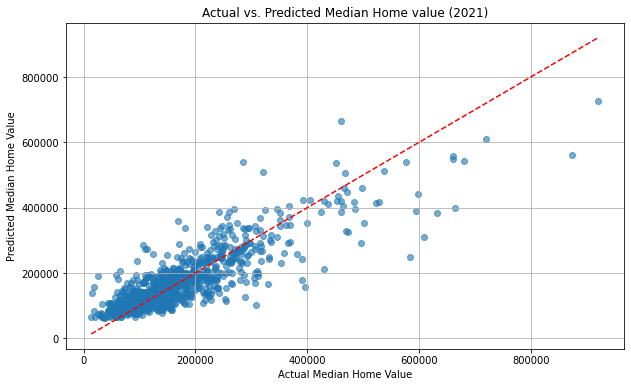

In [115]:

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_rfe2, alpha=0.6)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2021)')
plt.grid()
plt.show()


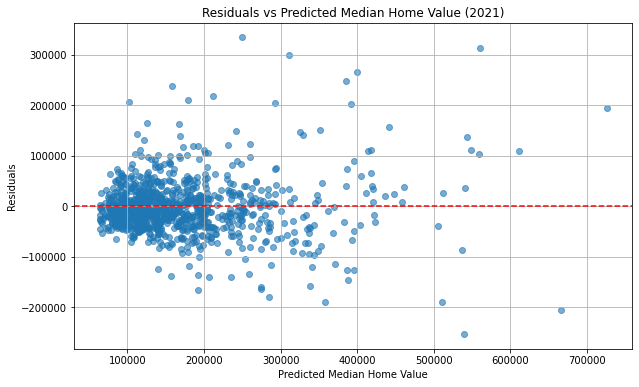

In [116]:
# Calculate residuals
residuals = y_test2 - y_pred_rfe2

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe2, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Red dashed line at y=0 for reference
plt.xlabel('Predicted Median Home Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median Home Value (2021)')
plt.grid()
plt.show()


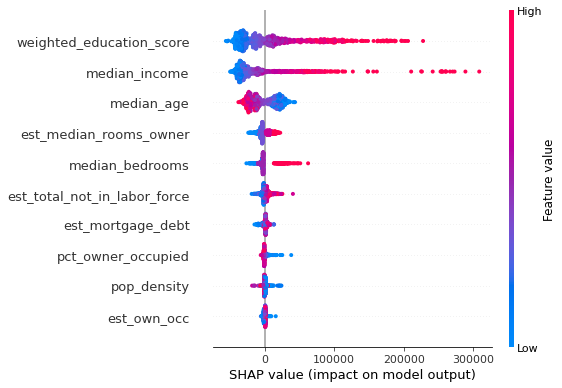

In [117]:
# Compute Shapley values for the test set (scaled and selected features)
shap_values_rf2 = explainer_rf.shap_values(X_test_rfe2)

# Summary Plot
# This plot will show the impact of each feature on the model's predictions across all samples
shap.summary_plot(shap_values_rf2, X_test_rfe2)

# Force Plot (for a single instance)
# This plot will show the contribution of each feature for a single prediction

shap.initjs()  # Initialize the JavaScript visualization
shap.force_plot(explainer_rf.expected_value[0], shap_values_rf2[0], X_test_rfe2.iloc[0])

In [118]:
#Create 2020 subset and repeat same steps as above to see how model is performing for 2020 year data

subset_2020_cleaned = subset_2020.drop('geo_id',axis =1)

subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] != 0]
subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] <= 1000000]

# Calculate the correlation matrix for the scaled data
X3 = subset_2020_cleaned.drop(columns=['shannon_index','berger_parker_dominance','simpson_dominance','simpson_evenness','median_value','other', 'pac_isl', 'native','two_or_more_races','higher_education_proportion']) 

y3 = subset_2020_cleaned['median_value'] 

scaled_data3 = scaler.fit_transform(X3)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df3 = pd.DataFrame(scaled_data3, columns=X3.columns)

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(scaled_df3, y3, test_size=0.2, random_state=42)

# Create DataFrames with selected features from the transformed data
X_train_rfe3 = X_train3.loc[X_train3.index, selected_features]  
X_test_rfe3 = X_test3.loc[X_test3.index, selected_features]

# Train the model with selected features
rf_model2.fit(X_train_rfe3, y_train3)

# Make predictions and evaluate
y_pred_rfe3 = rf_model2.predict(X_test_rfe3)
best_mse_rfe3 = mean_squared_error(y_test3, y_pred_rfe3)
best_rmse_rfe3 = np.sqrt(best_mse_rfe3)

print(f'Root Mean Squared Error with RFE: {best_rmse_rfe3:.2f}')


r2_rfe3 = r2_score(y_test3, y_pred_rfe3)
print(f'R-squared with RFE: {r2_rfe3:.2f}')

Root Mean Squared Error with RFE: 51685.72
R-squared with RFE: 0.73


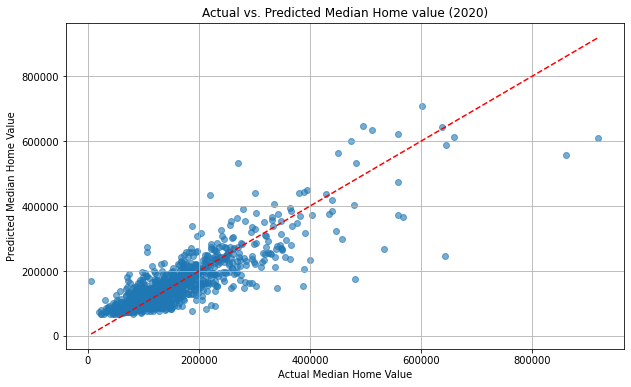

In [119]:

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_pred_rfe3, alpha=0.6)
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2020)')
plt.grid()
plt.show()


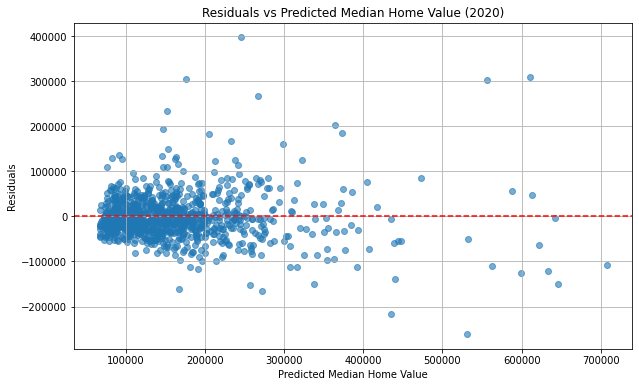

In [120]:
# Calculate residuals
residuals = y_test3 - y_pred_rfe3

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe3, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Red dashed line at y=0 for reference
plt.xlabel('Predicted Median Home Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median Home Value (2020)')
plt.grid()
plt.show()


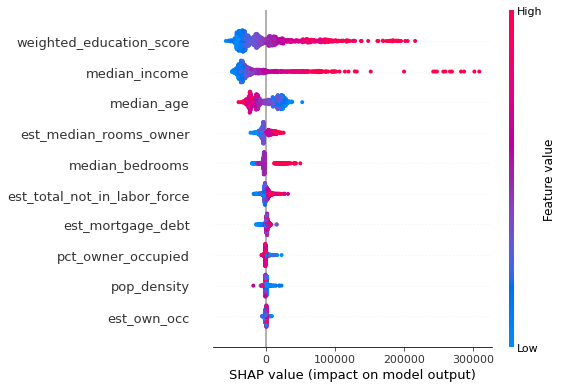

In [121]:
# Compute Shapley values for the test set (scaled and selected features)
shap_values_rf3 = explainer_rf.shap_values(X_test_rfe3)

# Summary Plot
# This plot will show the impact of each feature on the model's predictions across all samples
shap.summary_plot(shap_values_rf3, X_test_rfe3)

# Force Plot (for a single instance)
# This plot will show the contribution of each feature for a single prediction

shap.initjs()  # Initialize the JavaScript visualization
shap.force_plot(explainer_rf.expected_value[0], shap_values_rf3[0], X_test_rfe3.iloc[0])

* There is no major improvement in R2 and is only around 72-73%

In [122]:
#extract columns from original dataset

final_features = merged_df_selected.columns

#check column names
final_features

Index(['geo_id', 'est_tot_civilian_unemployed', 'est_total_not_in_labor_force',
       'year', 'est_own_occ', 'est_own_occ_kit_complete',
       'est_own_occ_plumb_complete', 'est_median_rooms_owner',
       'est_mortgage_debt', 'ipr', 'median_bedrooms', 'median_age',
       'shannon_index', 'simpsons_index', 'richness', 'simpson_dominance',
       'berger_parker_dominance', 'simpson_evenness', 'hispanic_or_latino',
       'asian', 'black', 'native', 'other', 'pac_isl', 'two_or_more_races',
       'white', 'gini_education', 'weighted_education_score',
       'higher_education_proportion', 'median_income', 'gini_coefficient',
       'median_value', 'pct_occupied', 'pct_owner_occupied', 'pop_density'],
      dtype='object')

In [123]:
#Check selected column list
selected_features

Index(['est_total_not_in_labor_force', 'est_own_occ', 'est_median_rooms_owner',
       'est_mortgage_debt', 'median_bedrooms', 'median_age',
       'weighted_education_score', 'median_income', 'pct_owner_occupied',
       'pop_density'],
      dtype='object')

In [124]:
#Create full dataset with features along with dependent variable
columns_for_model = ['geo_id', 'year','median_value'] + list(selected_features)

model_features = merged_df_selected[columns_for_model]

#check info
model_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15093 entries, 0 to 15092
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   year                          15093 non-null  int64  
 2   median_value                  15093 non-null  float64
 3   est_total_not_in_labor_force  15093 non-null  float64
 4   est_own_occ                   15093 non-null  int64  
 5   est_median_rooms_owner        15093 non-null  float64
 6   est_mortgage_debt             15093 non-null  float64
 7   median_bedrooms               15093 non-null  float64
 8   median_age                    15093 non-null  float64
 9   weighted_education_score      15093 non-null  float64
 10  median_income                 15093 non-null  float64
 11  pct_owner_occupied            15093 non-null  float64
 12  pop_density                   15093 non-null  float64
dtypes

In [ ]:
#Create Table in DB

mypasswd = getpass.getpass("Enter your database password: ")

# Database connection details
database = "f24t03"
user = "ypd5yb"
password = mypasswd
host = "pgsql"

# Create a connection to the database 
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{database}')


# Connect and create/drop the table, then insert data in chunks
try:
    # Connect to the database
    conn = psycopg2.connect(database=database, user=user, host=host, password=password)
    cursor = conn.cursor()
    print("Connected to the database.")

    # Drop the model_features_data table if it exists
    cursor.execute("DROP TABLE IF EXISTS model_features_data;")
    print("Dropped the model_features_data table if it existed.")

    # Create the model_features_data table
    create_table_query = """
CREATE TABLE model_features_data (
    geo_id TEXT NOT NULL,
    year INT NOT NULL,
    median_value FLOAT8 NOT NULL,
    est_total_not_in_labor_force FLOAT8 NOT NULL,
    est_own_occ INT NOT NULL,
    est_median_rooms_owner FLOAT8 NOT NULL,
    est_mortgage_debt FLOAT8 NOT NULL,
    median_bedrooms FLOAT8 NOT NULL,
    median_age FLOAT8 NOT NULL,
    weighted_education_score FLOAT8 NOT NULL,
    median_income FLOAT8 NOT NULL,
    pct_owner_occupied FLOAT8 NOT NULL,
    pop_density FLOAT8 NOT NULL,
    PRIMARY KEY (geo_id, year)
);
    """
    cursor.execute(create_table_query)
    conn.commit()
    print("Created the model_features_data table.")

    # Insert data from df_pivot in chunks
    chunk_size = 500
    for start in range(0, len(model_features), chunk_size):
        chunk = model_features.iloc[start:start + chunk_size]
        chunk.to_sql('model_features_data', engine, if_exists='append', index=False)
        print(f"Uploaded a chunk of {len(chunk)} records to the model_features_data table.")

    print("Data uploaded successfully.")

    # Query the inserted data to confirm
    query = "SELECT * FROM model_features_data;"
    model_features = pd.read_sql(query, conn)
    print("Data extracted successfully! DataFrame shape:", model_features.shape)

except Exception as e:
    print("An error occurred:", e)

finally:
    # Ensure that the cursor and connection are closed
    if cursor:
        cursor.close()
    if conn:
        conn.close()


Enter your database password: ········
Connected to the database.
Dropped the model_features_data table if it existed.
Created the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_features_data table.
Uploaded a chunk of 500 records to the model_featu

In [127]:
#Check structure after extraction
model_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   geo_id                        15093 non-null  object 
 1   year                          15093 non-null  int64  
 2   median_value                  15093 non-null  float64
 3   est_total_not_in_labor_force  15093 non-null  float64
 4   est_own_occ                   15093 non-null  int64  
 5   est_median_rooms_owner        15093 non-null  float64
 6   est_mortgage_debt             15093 non-null  float64
 7   median_bedrooms               15093 non-null  float64
 8   median_age                    15093 non-null  float64
 9   weighted_education_score      15093 non-null  float64
 10  median_income                 15093 non-null  float64
 11  pct_owner_occupied            15093 non-null  float64
 12  pop_density                   15093 non-null  float64
dtypes

In [128]:
model_features.head()

geo_id  year  median_value  est_total_not_in_labor_force  \
0  1500000US290019501001  2020      142300.0                      0.383946   
1  1500000US290019501001  2021      148100.0                      0.379487   
2  1500000US290019501001  2022      178900.0                      0.363050   
3  1500000US290019501002  2020      148300.0                      0.343805   
4  1500000US290019501002  2021      148800.0                      0.377543   

   est_own_occ  est_median_rooms_owner  est_mortgage_debt  median_bedrooms  \
0          435                     7.0           0.436782              3.0   
1          411                     7.0           0.525547              3.0   
2          405                     6.0           0.545679              3.0   
3          453                     6.0           0.415011              3.0   
4          482                     6.0           0.435685              3.0   

   median_age  weighted_education_score  median_income  pct_owner_occupied  \
0        36.0                      4.76        56313.0               97.10   
1        40.0                      4.82        70972.0               96.25   
2        39.0                      5.08        80208.0               94.85   
3        38.0                      5.11        57167.0               87.79   
4        31.0                      4.86        59125.0               88.28   

   pop_density  
0         14.0  
1         13.0  
2         12.0  
3         15.0  
4         15.0

In [129]:
#grant privileges

grant_privileges_query = "GRANT ALL PRIVILEGES ON TABLE model_features_data TO jsmm8, remcmf, sgdky;"

with engine.connect() as connection:
        connection.execute(text(grant_privileges_query))
        print("Privileges granted successfully.")

Privileges granted successfully.


# XGBoost

In [130]:

#Create 2020 subset and repeat same steps as above to see how model is performing for 2020 year data

subset_2020_cleaned = subset_2020.drop('geo_id',axis =1)

subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] != 0]
subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] <= 1000000]

# Calculate the correlation matrix for the scaled data
X3 = subset_2020_cleaned.drop(columns=['shannon_index','berger_parker_dominance','simpson_dominance','simpson_evenness','median_value','other', 'pac_isl', 'native','two_or_more_races','higher_education_proportion']) 

y3 = subset_2020_cleaned['median_value'] 

scaled_data3 = scaler.fit_transform(X3)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df3 = pd.DataFrame(scaled_data3, columns=X3.columns)

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(scaled_df3, y3, test_size=0.2, random_state=42)

# Create DataFrames with selected features from the transformed data
X_train_rfe3 = X_train3.loc[X_train3.index, selected_features]  
X_test_rfe3 = X_test3.loc[X_test3.index, selected_features]

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_rfe3, label=y_train3)
dtest = xgb.DMatrix(X_test_rfe3, label=y_test3)

# Train the XGBoost model
params = {
    'objective': 'reg:squarederror', # Regression task
    'max_depth': 6,                  # Depth of each tree
    'eta': 0.1,                      # Learning rate
    'subsample': 0.8,                # Subsample ratio
    'colsample_bytree': 0.8,         # Feature subsample ratio
    'seed': 42                       # Seed for reproducibility
}

num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions and evaluate
y_pred_rfe3 = xgb_model.predict(dtest)
best_mse_rfe3 = mean_squared_error(y_test3, y_pred_rfe3)
best_rmse_rfe3 = np.sqrt(best_mse_rfe3)
r2_rfe3 = r2_score(y_test3, y_pred_rfe3)

print(f'Root Mean Squared Error with XGBoost: {best_rmse_rfe3:.2f}')
print(f'R-squared with XGBoost: {r2_rfe3:.2f}')

Root Mean Squared Error with XGBoost: 50860.07
R-squared with XGBoost: 0.74


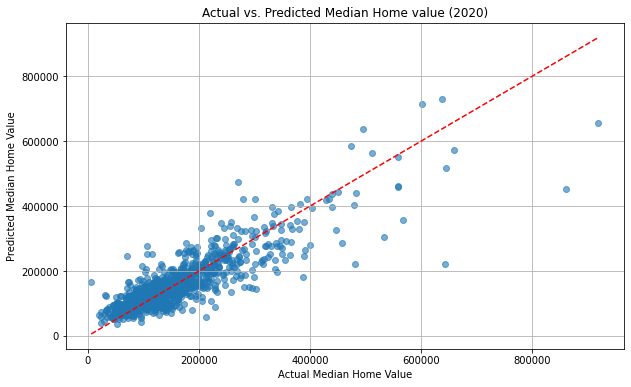

In [131]:

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_pred_rfe3, alpha=0.6)
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2020)')
plt.grid()
plt.show()


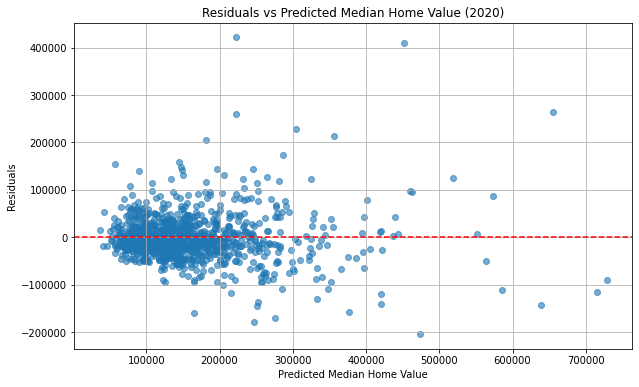

In [132]:
# Calculate residuals
residuals = y_test3 - y_pred_rfe3

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe3, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Red dashed line at y=0 for reference
plt.xlabel('Predicted Median Home Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median Home Value (2020)')
plt.grid()
plt.show()


In [133]:


# Preprocess the 2021 subset and use this to train
subset_2021_cleaned = subset_2021.drop('geo_id', axis=1)
subset_2021_cleaned = subset_2021_cleaned[subset_2021_cleaned['median_value'] != 0]
subset_2021_cleaned = subset_2021_cleaned[subset_2021_cleaned['median_value'] <= 1000000]

# Select features and target variable
X2 = subset_2021_cleaned.drop(columns=['shannon_index', 'berger_parker_dominance', 'simpson_dominance',
                                        'simpson_evenness', 'median_value', 'other', 'pac_isl', 'native',
                                        'two_or_more_races',  'higher_education_proportion'])
y2 = subset_2021_cleaned['median_value']

# Scale the data
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(X2)

# Convert the scaled data back to a DataFrame
scaled_df2 = pd.DataFrame(scaled_data2, columns=X2.columns)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_df2, y2, test_size=0.2, random_state=42)

# Create DataFrames with selected features
X_train_rfe2 = X_train2.loc[X_train2.index, selected_features]  
X_test_rfe2 = X_test2.loc[X_test2.index, selected_features]

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_rfe2, label=y_train2)
dtest = xgb.DMatrix(X_test_rfe2, label=y_test2)

# Train the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 6,                  # Depth of each tree
    'eta': 0.1,                      # Learning rate
    'subsample': 0.8,                # Subsample ratio
    'colsample_bytree': 0.8,         # Feature subsample ratio
    'seed': 42                       # Seed for reproducibility
}

num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions and evaluate
y_pred_rfe2 = xgb_model.predict(dtest)
best_mse_rfe2 = mean_squared_error(y_test2, y_pred_rfe2)
best_rmse_rfe2 = np.sqrt(best_mse_rfe2)
r2_rfe2 = r2_score(y_test2, y_pred_rfe2)

print(f'Root Mean Squared Error with XGBoost: {best_rmse_rfe2:.2f}')
print(f'R-squared with XGBoost: {r2_rfe2:.2f}')


Root Mean Squared Error with XGBoost: 54915.67
R-squared with XGBoost: 0.74


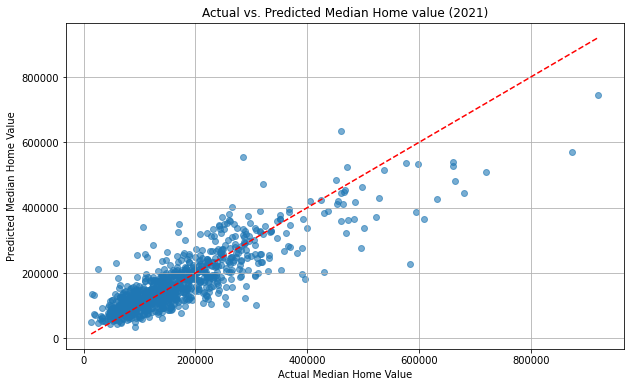

In [134]:

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_rfe2, alpha=0.6)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2021)')
plt.grid()
plt.show()


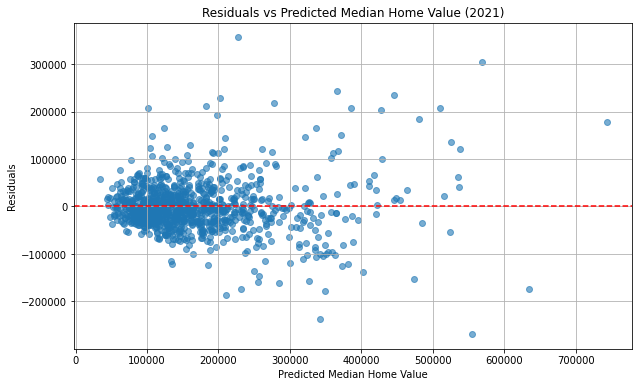

In [135]:
# Calculate residuals
residuals = y_test2 - y_pred_rfe2

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe2, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Red dashed line at y=0 for reference
plt.xlabel('Predicted Median Home Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median Home Value (2021)')
plt.grid()
plt.show()


In [136]:
# Create DataFrames with selected features from the transformed 2022 data
X_train_rfe = X_train.loc[X_train.index, selected_features]  
X_test_rfe = X_test.loc[X_test.index, selected_features]

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_rfe, label=y_train)
dtest = xgb.DMatrix(X_test_rfe, label=y_test)

# Train the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 6,                  # Depth of each tree
    'eta': 0.1,                      # Learning rate
    'subsample': 0.8,                # Subsample ratio
    'colsample_bytree': 0.8,         # Feature subsample ratio
    'seed': 42                       # Seed for reproducibility
}

num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions and evaluate
y_pred_rfe = xgb_model.predict(dtest)
best_mse_rfe = mean_squared_error(y_test, y_pred_rfe)
best_rmse_rfe = np.sqrt(best_mse_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print(f'Root Mean Squared Error with XGBoost: {best_rmse_rfe:.2f}')
print(f'R-squared with XGBoost: {r2_rfe:.2f}')

Root Mean Squared Error with XGBoost: 65329.73
R-squared with XGBoost: 0.72


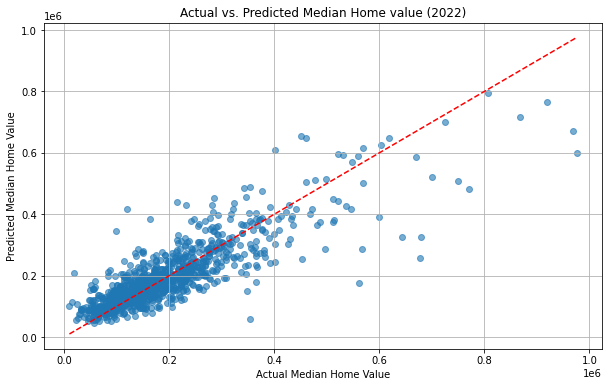

In [137]:
#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfe, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2022)')
plt.grid()
plt.show()

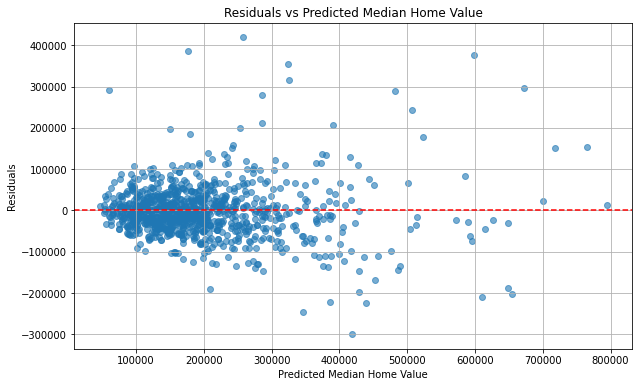

In [138]:
# Calculate residuals
residuals = y_test - y_pred_rfe

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Median Home Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median Home Value')
plt.grid()
plt.show()

Before Hyper Parameter Tuning, we see only 72 to 74% R-squared

# Hyper Parameter Tuning with 5-fold CV - XGBoost

In [139]:


# Define the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)



param_grid = {
    'n_estimators': [150, 200, 250],       # Around the best value 200
    'max_depth': [5, 6, 7],               # Around the best value 6
    'learning_rate': [0.04, 0.05, 0.06],  # Narrowed around 0.05
    'subsample': [0.5, 0.6, 0.7],         # Around 0.6
    'colsample_bytree': [0.5, 0.6, 0.7],  # Around 0.6
    'reg_alpha': [0.5, 1, 1.5],           # Centered at 1
    'reg_lambda': [0.8, 1, 1.2]           # Around 1
}



# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available CPUs
)

# Fit RandomizedSearchCV on training 2022 data
random_search.fit(X_train_rfe, y_train)

# Extract the best parameters and best score
best_params = random_search.best_params_
best_score = -random_search.best_score_

print("Best Parameters:", best_params)
print(f"Best RMSE from RandomizedSearchCV: {np.sqrt(best_score):.2f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.2, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.04, 'colsample_bytree': 0.6}
Best RMSE from RandomizedSearchCV: 59148.19


**Final Params:**

*Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.2, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.04, 'colsample_bytree': 0.6}*

*Best RMSE from RandomizedSearchCV: 59148.19*

# Below params are tested
* param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [3, 6, 9, 12],           # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of the training data
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of features per tree
    'reg_alpha': [0, 0.1, 1],             # L1 regularization strength
    'reg_lambda': [1, 1.5, 2],            # L2 regularization strength}

*Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.6}*

*Best RMSE from RandomizedSearchCV: 59486.31*

* param_grid = {
    'n_estimators': [140, 150, 160],       # Around 150, narrowing the range
    'max_depth': [4, 5, 6],                # Narrowed around 5
    'learning_rate': [0.05, 0.06, 0.07],   # Narrowing around 0.06
    'subsample': [0.6, 0.7, 0.8],          # Refined range around 0.7
    'colsample_bytree': [0.5, 0.6, 0.7],   # Refined range around 0.6
    'reg_alpha': [0.9, 1, 1.1],            # Refined range around 1
    'reg_lambda': [0.7, 0.8, 0.9]          # Refined range around 0.8}

*Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.8, 'reg_alpha': 0.9, 'n_estimators': 160, 'max_depth': 4, 'learning_rate': 0.07, 'colsample_bytree': 0.6}*

*Best RMSE from RandomizedSearchCV: 59047.26*



In [140]:
# Define the best parameters
best_params = {
    'n_estimators': 200,      # Number of trees
    'max_depth': 5,           # Maximum depth of a tree
    'learning_rate': 0.04,    # Step size shrinkage
    'subsample': 0.6,         # Subsample ratio of the training data
    'colsample_bytree': 0.6,  # Subsample ratio of features per tree
    'reg_alpha': 1,           # L1 regularization strength
    'reg_lambda': 1.2         # L2 regularization strength
}

In [141]:
# Create DataFrames with selected features from the transformed 2022 data
X_train_rfe = X_train.loc[X_train.index, selected_features]  
X_test_rfe = X_test.loc[X_test.index, selected_features]

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_rfe, label=y_train)
dtest = xgb.DMatrix(X_test_rfe, label=y_test)

# Train the XGBoost model
best_params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,                     
    'eta': 0.04,                        
    'subsample': 0.6,                   
    'colsample_bytree': 0.6,            
    'reg_alpha': 1,                   
    'reg_lambda':1.2,                  
    'seed': 42                          
}

num_round = 200  # number of boosting rounds (num_estimators)
xgb_model = xgb.train(best_params, dtrain, num_round)

# Make predictions and evaluate
y_pred_rfe = xgb_model.predict(dtest)
best_mse_rfe = mean_squared_error(y_test, y_pred_rfe)
best_rmse_rfe = np.sqrt(best_mse_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print(f'Root Mean Squared Error with XGBoost: {best_rmse_rfe:.2f}')
print(f'R-squared with XGBoost: {r2_rfe:.2f}')

Root Mean Squared Error with XGBoost: 64848.35
R-squared with XGBoost: 0.72


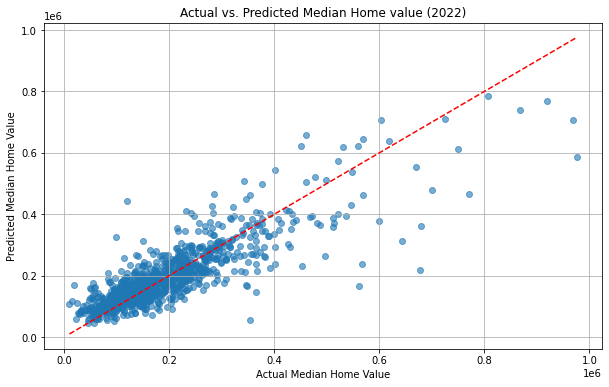

In [142]:
#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfe, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2022)')
plt.grid()
plt.show()

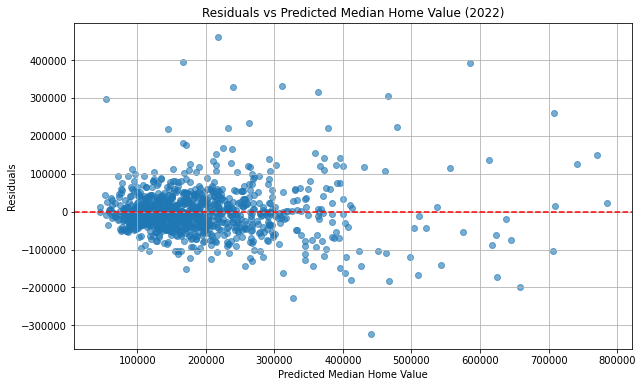

In [143]:
# Calculate residuals
residuals = y_test - y_pred_rfe

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Median Home Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median Home Value (2022)')
plt.grid()
plt.show()

In [144]:
# Preprocess the 2021 subset
subset_2021_cleaned = subset_2021.drop('geo_id', axis=1)
subset_2021_cleaned = subset_2021_cleaned[subset_2021_cleaned['median_value'] != 0]
subset_2021_cleaned = subset_2021_cleaned[subset_2021_cleaned['median_value'] <= 1000000]

# Select features and target variable
X2 = subset_2021_cleaned.drop(columns=['shannon_index', 'berger_parker_dominance', 'simpson_dominance',
                                        'simpson_evenness', 'median_value', 'other', 'pac_isl', 'native',
                                        'two_or_more_races',  'higher_education_proportion'])
y2 = subset_2021_cleaned['median_value']

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(X2)

# Convert the scaled data back to a DataFrame
scaled_df2 = pd.DataFrame(scaled_data2, columns=X2.columns)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_df2, y2, test_size=0.2, random_state=42)

# Create DataFrames with selected features 
X_train_rfe2 = X_train2.loc[X_train2.index, selected_features]  
X_test_rfe2 = X_test2.loc[X_test2.index, selected_features]

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_rfe2, label=y_train2)
dtest = xgb.DMatrix(X_test_rfe2, label=y_test2)


num_round = 200  # number of boosting rounds (num_estimators)
xgb_model = xgb.train(best_params, dtrain, num_round)

# Make predictions and evaluate the model
y_pred_rfe2 = xgb_model.predict(dtest)

# Evaluate the performance
best_mse_rfe2 = mean_squared_error(y_test2, y_pred_rfe2)
best_rmse_rfe2 = np.sqrt(best_mse_rfe2)
r2_rfe2 = r2_score(y_test2, y_pred_rfe2)

# Output the evaluation metrics
print(f'Root Mean Squared Error with XGBoost: {best_rmse_rfe2:.2f}')
print(f'R-squared with XGBoost: {r2_rfe2:.2f}')


Root Mean Squared Error with XGBoost: 53095.23
R-squared with XGBoost: 0.75


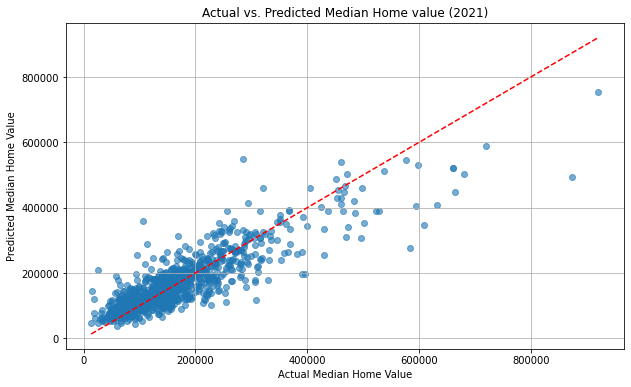

In [145]:

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_rfe2, alpha=0.6)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2021)')
plt.grid()
plt.show()


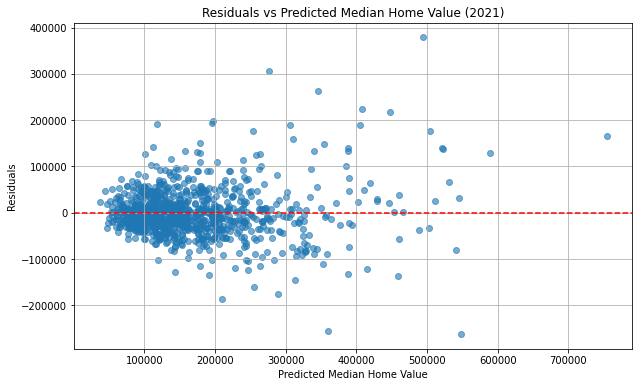

In [146]:
# Calculate residuals
residuals = y_test2 - y_pred_rfe2

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe2, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Red dashed line at y=0 for reference
plt.xlabel('Predicted Median Home Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median Home Value (2021)')
plt.grid()
plt.show()


In [147]:
#Create 2020 subset and repeat same steps as above to see how model is performing for 2020 year data

subset_2020_cleaned = subset_2020.drop('geo_id',axis =1)

subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] != 0]
subset_2020_cleaned = subset_2020_cleaned[subset_2020_cleaned['median_value'] <= 1000000]

# Calculate the correlation matrix for the scaled data
X3 = subset_2020_cleaned.drop(columns=['shannon_index','berger_parker_dominance','simpson_dominance','simpson_evenness','median_value','other', 'pac_isl', 'native','two_or_more_races','higher_education_proportion']) 

y3 = subset_2020_cleaned['median_value'] 

scaled_data3 = scaler.fit_transform(X3)

# Convert the scaled data back to a DataFrame with the original column names
scaled_df3 = pd.DataFrame(scaled_data3, columns=X3.columns)

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(scaled_df3, y3, test_size=0.2, random_state=42)

# Create DataFrames with selected features from the transformed data
X_train_rfe3 = X_train3.loc[X_train3.index, selected_features]  
X_test_rfe3 = X_test3.loc[X_test3.index, selected_features]

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_rfe3, label=y_train3)
dtest = xgb.DMatrix(X_test_rfe3, label=y_test3)


num_round = 200  # number of boosting rounds (num_estimators)
xgb_model = xgb.train(best_params, dtrain, num_round)


# Make predictions and evaluate the model
y_pred_rfe3 = xgb_model.predict(dtest)

# Evaluate the performance
best_mse_rfe3 = mean_squared_error(y_test3, y_pred_rfe3)
best_rmse_rfe3 = np.sqrt(best_mse_rfe3)
r2_rfe3 = r2_score(y_test3, y_pred_rfe3)

# Output the evaluation metrics
print(f'Root Mean Squared Error with XGBoost: {best_rmse_rfe3:.2f}')
print(f'R-squared with XGBoost: {r2_rfe3:.2f}')


Root Mean Squared Error with XGBoost: 49207.21
R-squared with XGBoost: 0.75


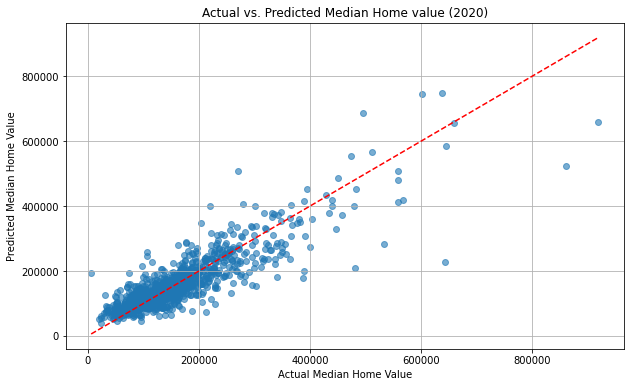

In [148]:

#Plot actual vs. predicted values for RFE model
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_pred_rfe3, alpha=0.6)
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], color='red', linestyle='--')
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home value (2020)')
plt.grid()
plt.show()


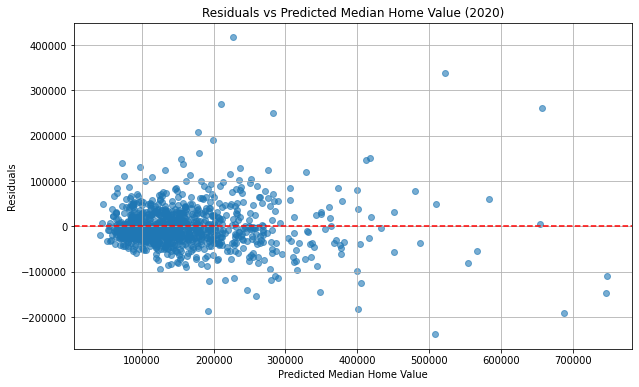

In [149]:
# Calculate residuals
residuals = y_test3 - y_pred_rfe3

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe3, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Red dashed line at y=0 for reference
plt.xlabel('Predicted Median Home Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median Home Value (2020)')
plt.grid()
plt.show()


* XGBoost gave better performance of having 72 to 75% which is atleast 2% more than Randomforest and 15% more than linear regression